## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.make_plot import plot

plt.rcParams["figure.figsize"] = (12, 7)
plt.rcParams["figure.dpi"] = 200

## Data

In [2]:
clients = pd.read_csv("data/portfolio_clientes.csv")
tpv = pd.read_csv("data/portfolio_tpv.csv")
comunicados = pd.read_csv("data/portfolio_comunicados.csv")
geral = pd.read_csv("data/portfolio_geral.csv")

## Clientes

In [3]:
# total de clientes
clients_wo_duplicate = clients.drop_duplicates(["nr_documento"])
clients_wo_duplicate.shape

(14265, 6)

In [4]:
geral.drop_duplicates("contrato_id").shape

(14756, 22)

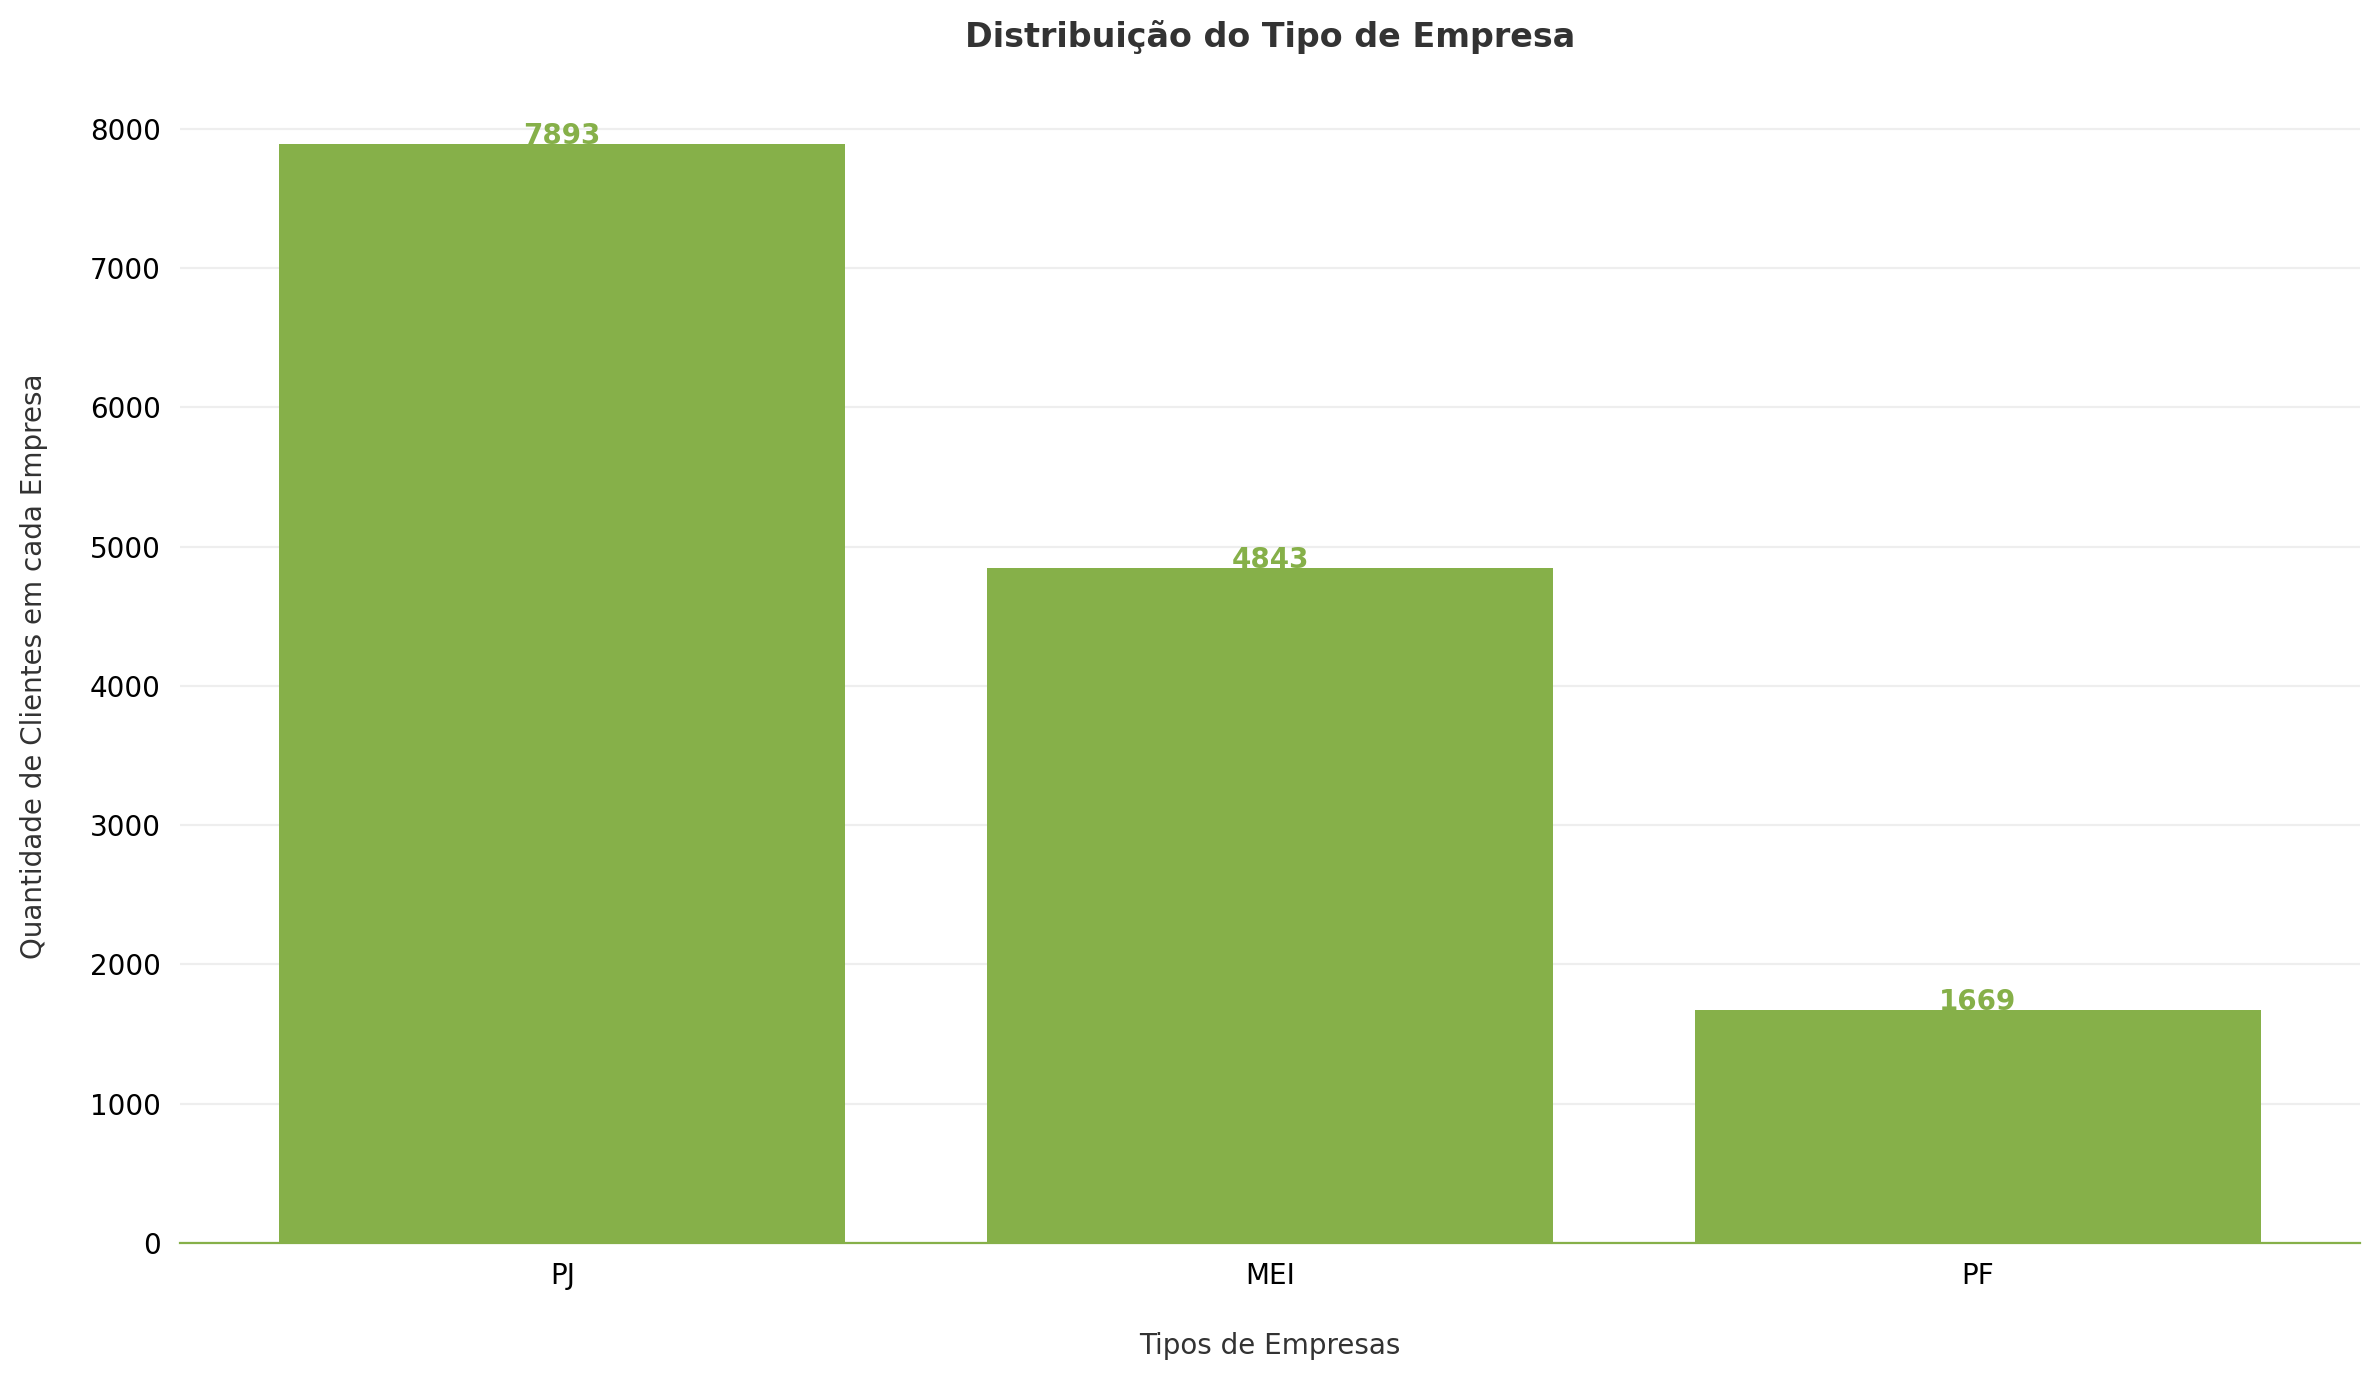

In [5]:
# getthering the data to plot
counts = clients.value_counts("tipo_empresa").reset_index()
y = counts[0].values
x = counts["tipo_empresa"].values

plot.make_beautiful_bar_plots(
    x,
    y,
    "Distribuição do Tipo de Empresa",
    "Tipos de Empresas",
    "Quantidade de Clientes em cada Empresa",
    False,
)

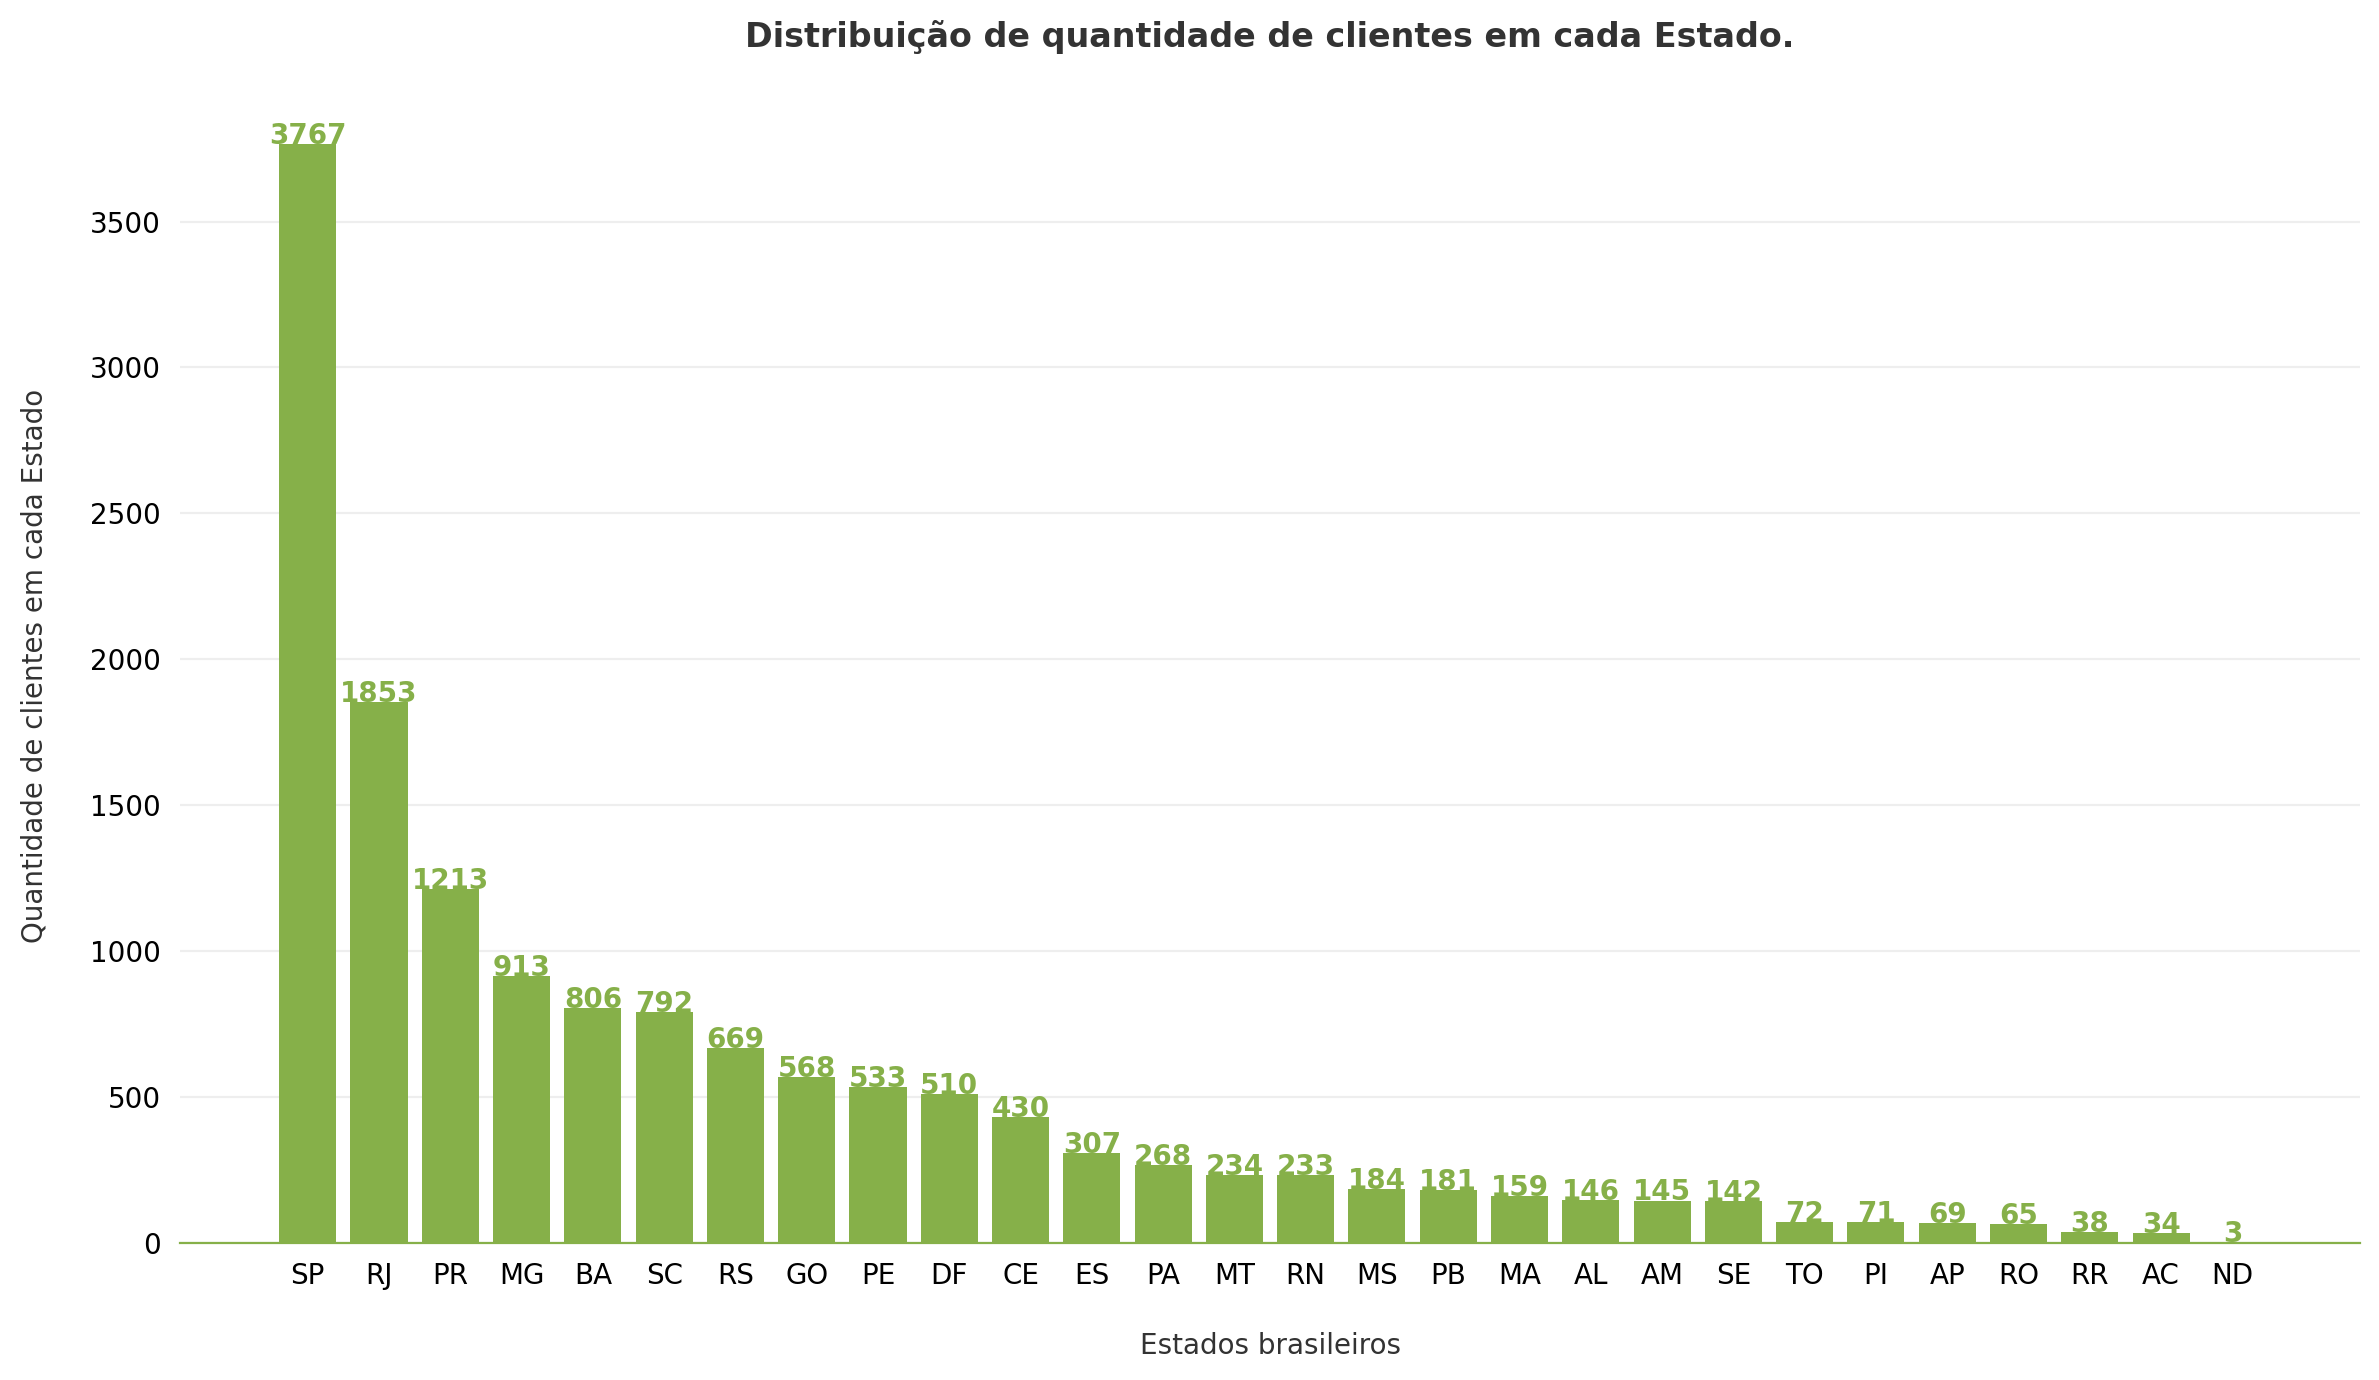

In [6]:
counts = clients.value_counts("estado").reset_index()
y = counts[0].values
x = counts["estado"].values

plot.make_beautiful_bar_plots(
    x,
    y,
    "Distribuição de quantidade de clientes em cada Estado.",
    "Estados brasileiros",
    "Quantidade de clientes em cada Estado",
    False,
)

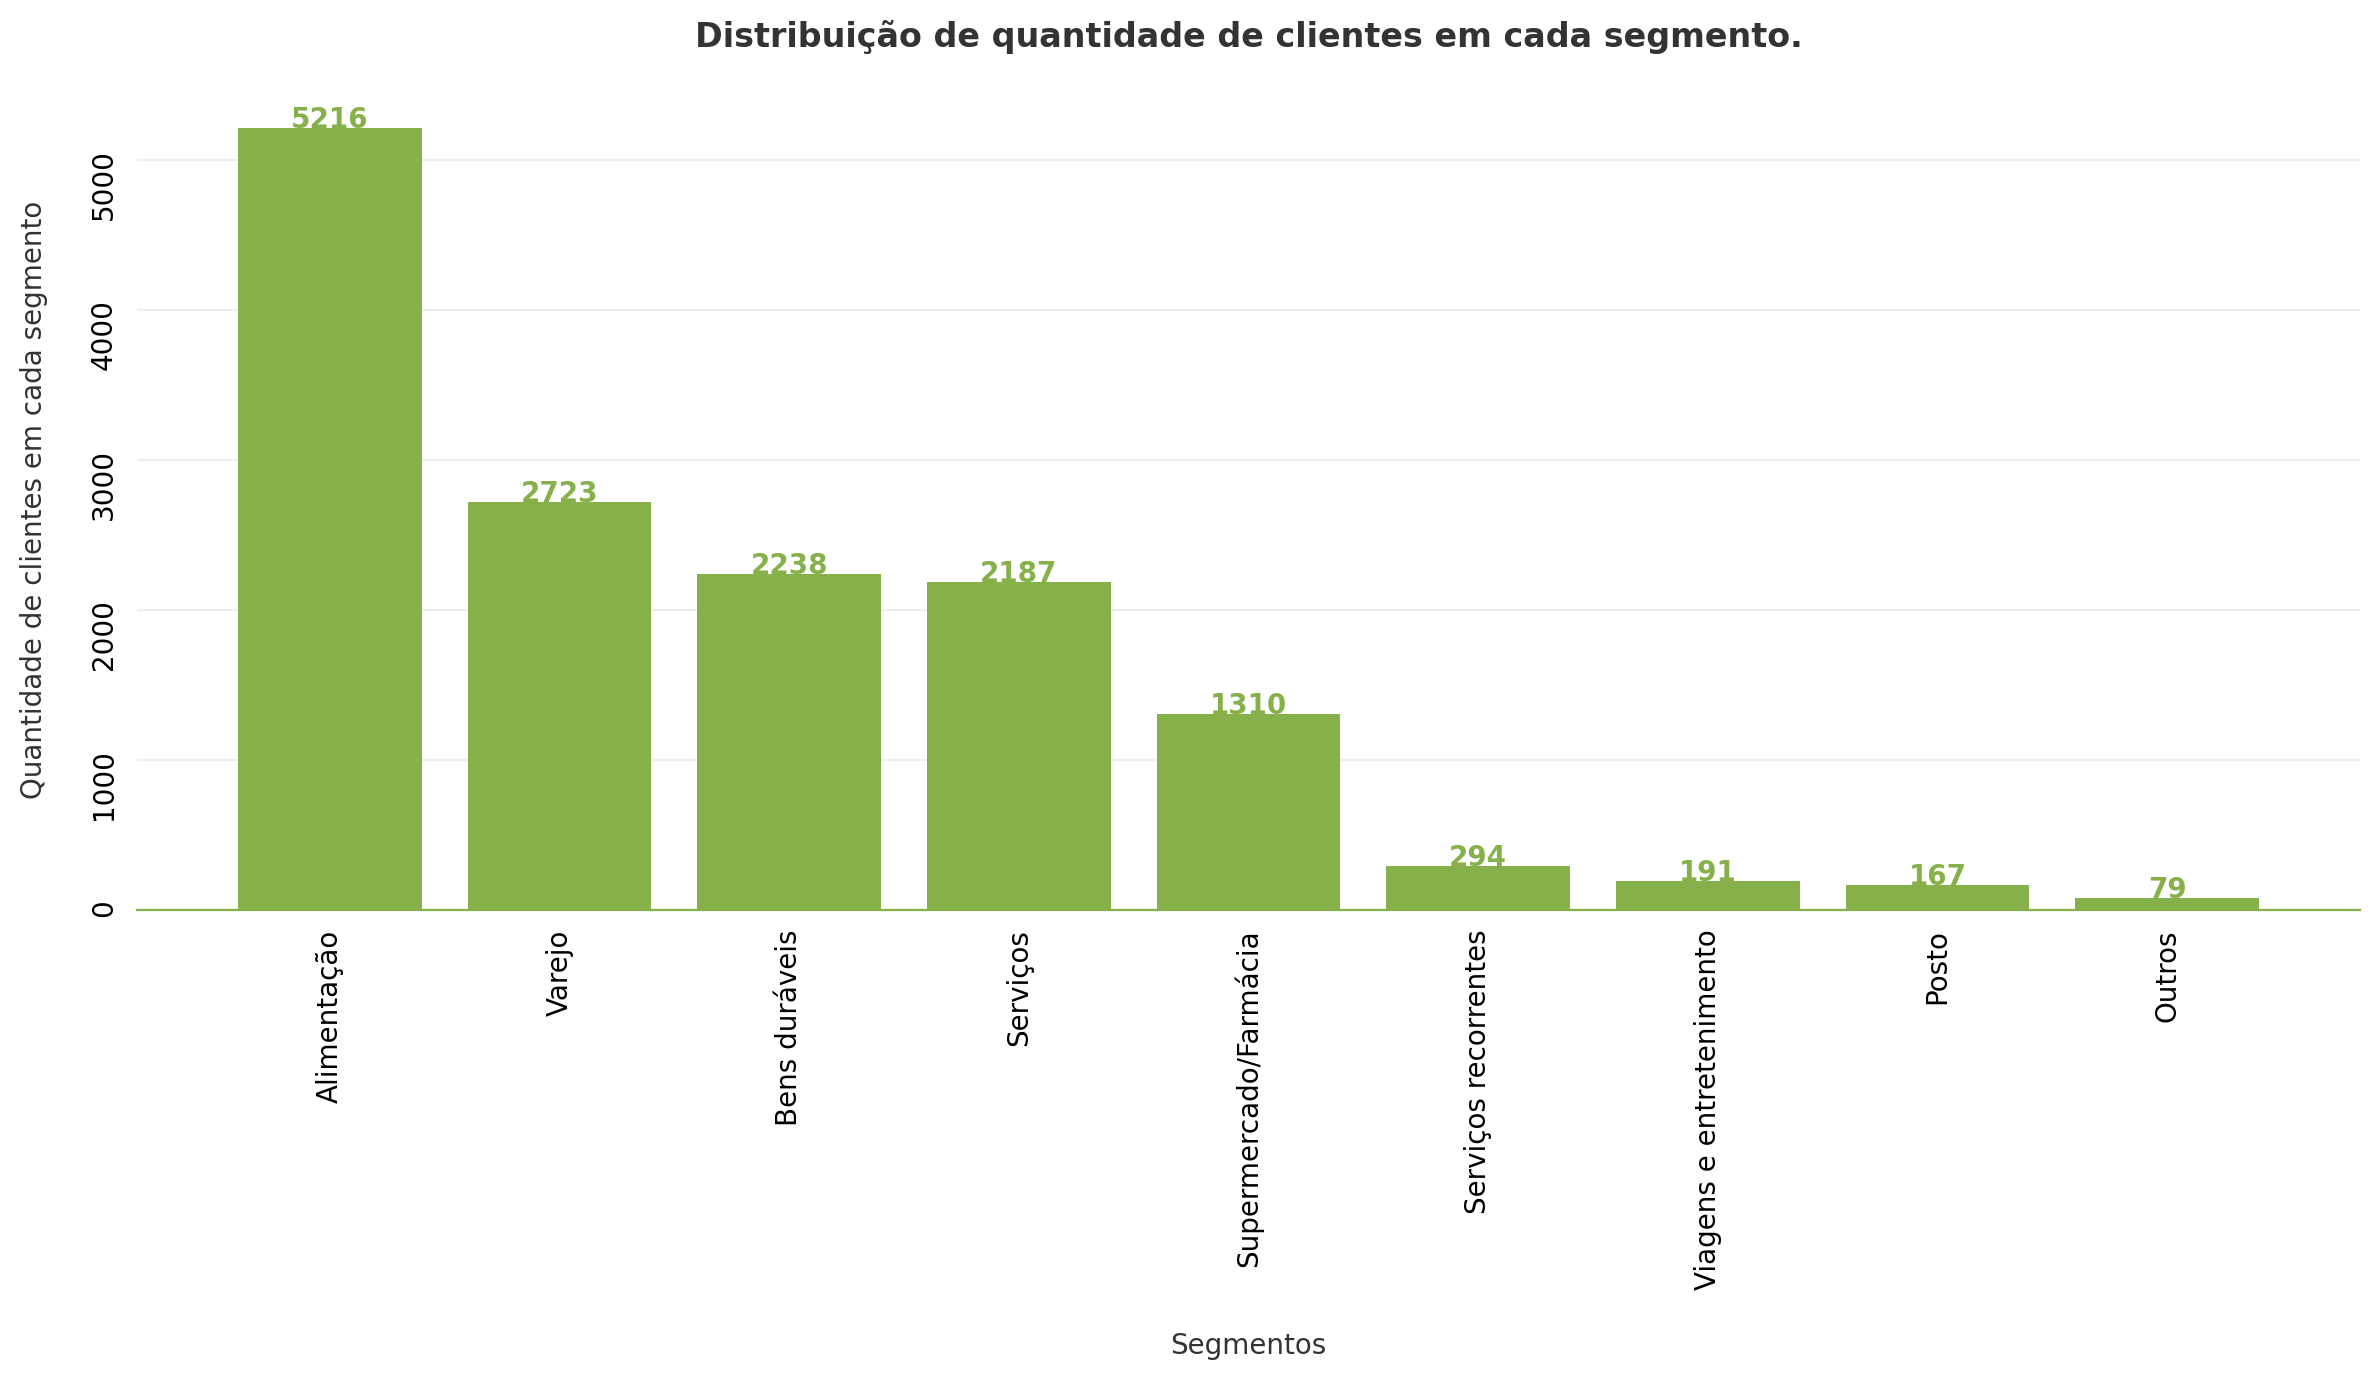

In [7]:
counts = clients.value_counts("segmento").reset_index()
y = counts[0].values
x = counts["segmento"].values

plot.make_beautiful_bar_plots(
    x,
    y,
    "Distribuição de quantidade de clientes em cada segmento.",
    "Segmentos",
    "Quantidade de clientes em cada segmento",
    True,
)

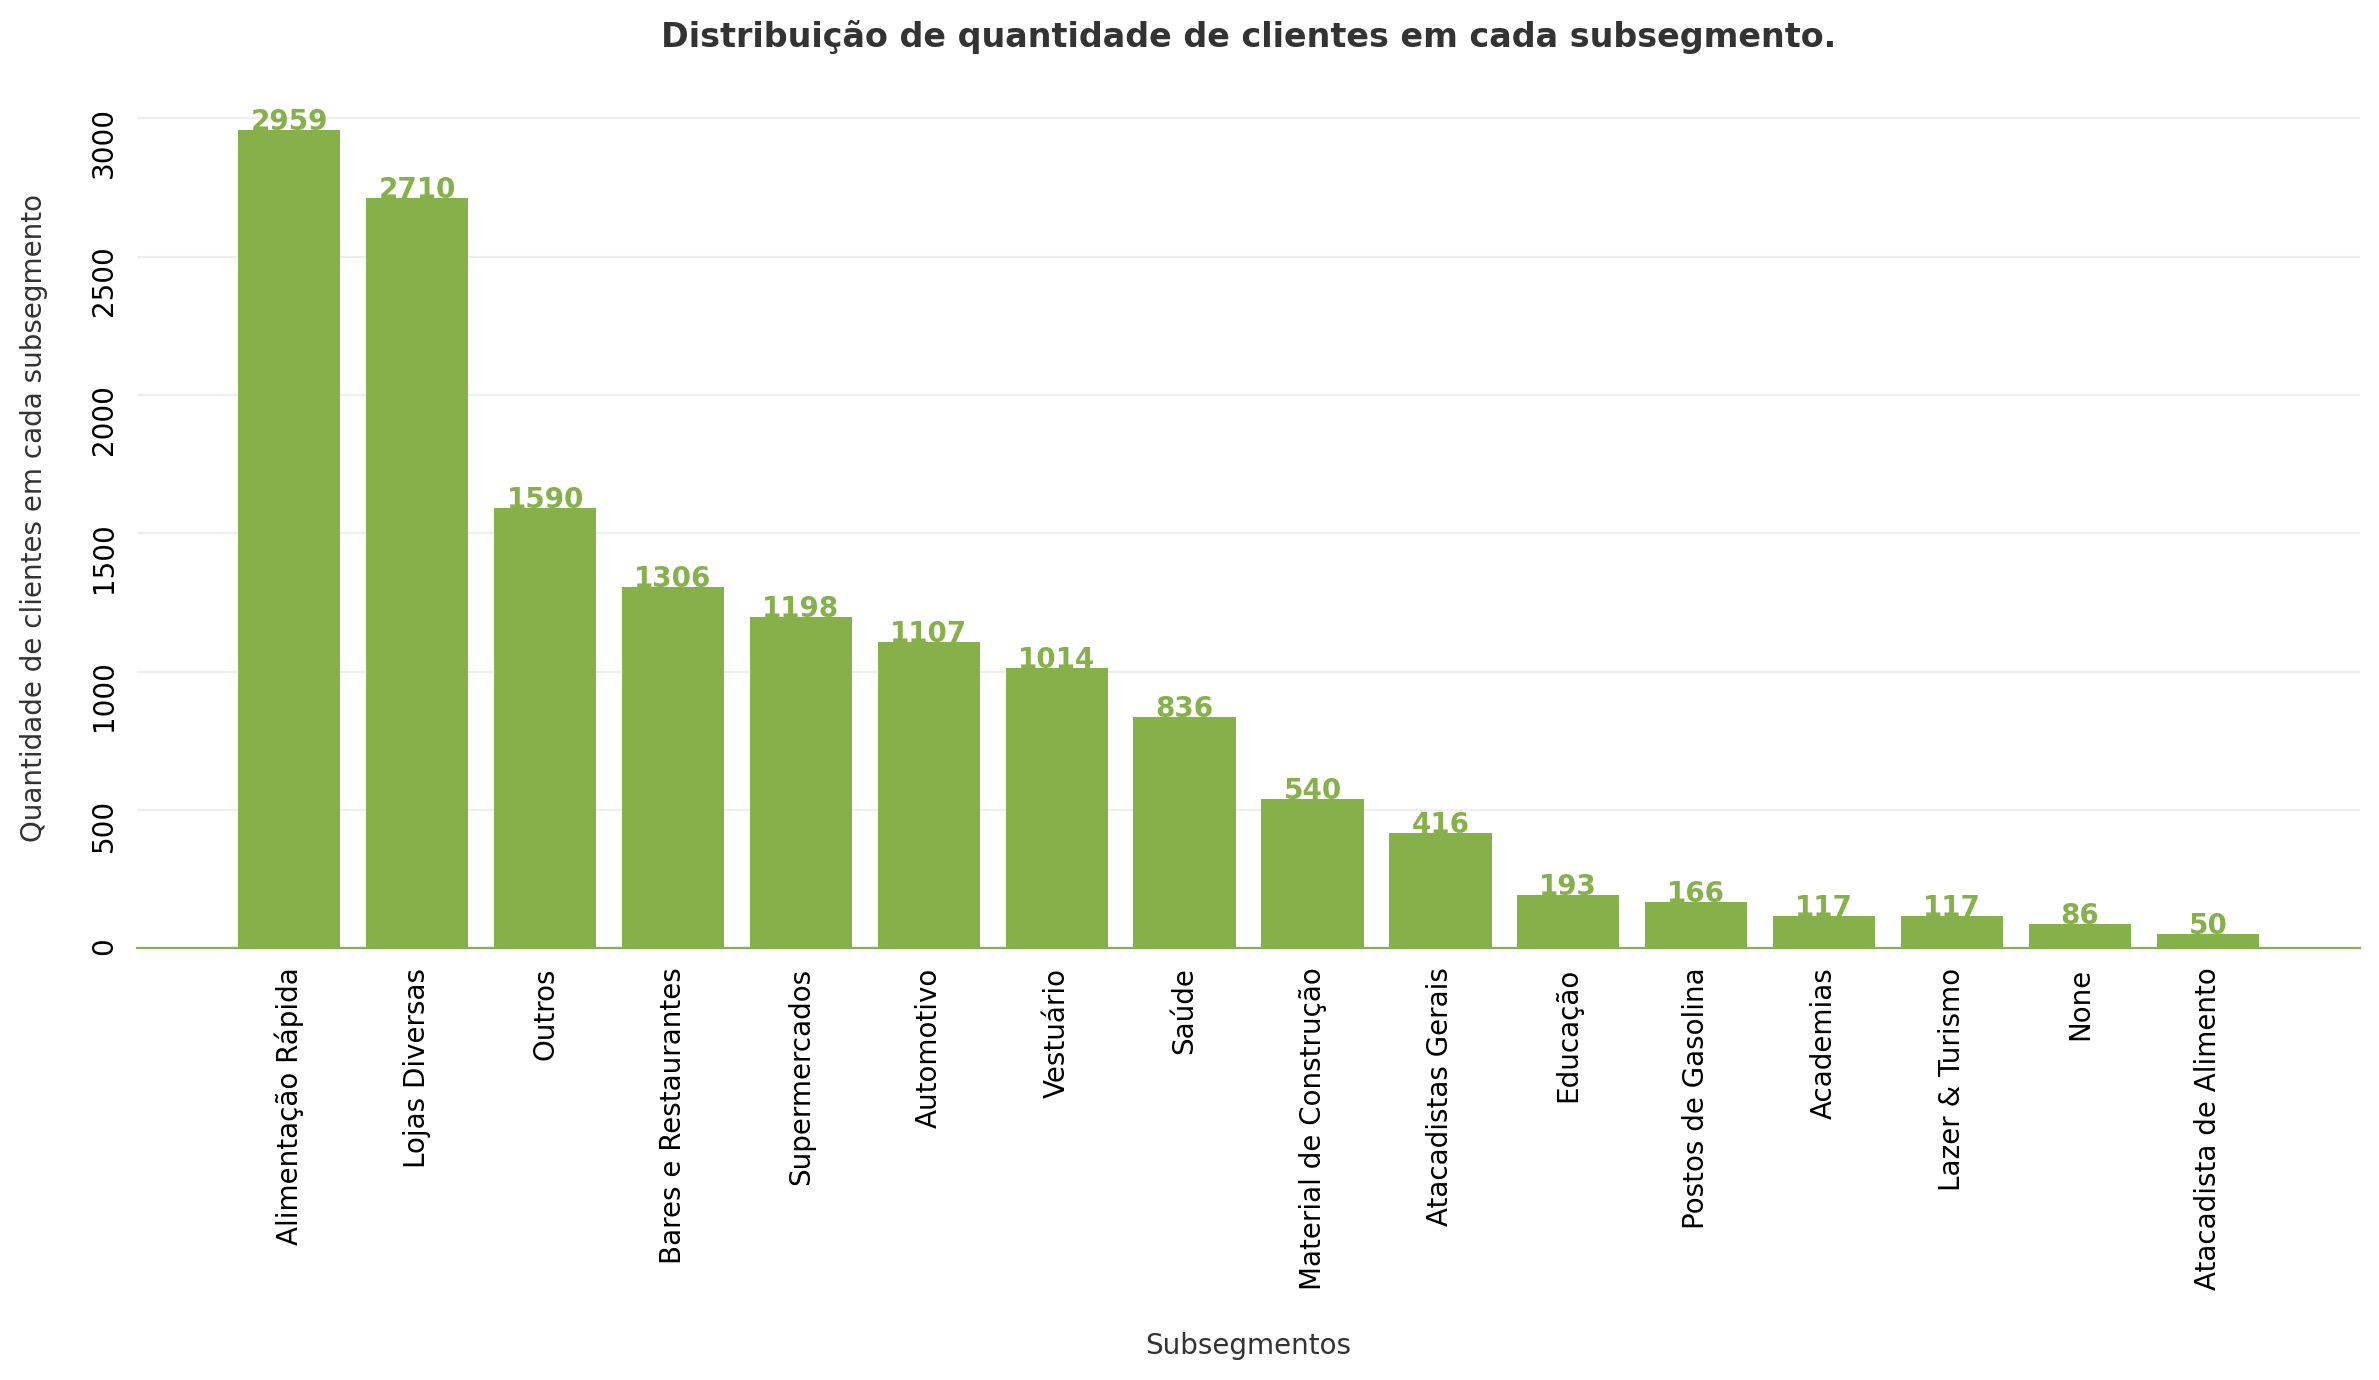

In [8]:
counts = clients.value_counts("subsegmento").reset_index()
y = counts[0].values
x = counts["subsegmento"].values

plot.make_beautiful_bar_plots(
    x,
    y,
    "Distribuição de quantidade de clientes em cada subsegmento.",
    "Subsegmentos",
    "Quantidade de clientes em cada subsegmento",
    True,
)

## TPV

In [9]:
tpv.drop_duplicates("nr_documento").shape

(14259, 4)

In [10]:
nr_documento_tpv = tpv.drop_duplicates("nr_documento")["nr_documento"].to_list()
geral_for_not_tpv = geral[~geral["nr_documento"].isin(nr_documento_tpv)]
geral_for_not_tpv[["vlr_desembolsado", "vlr_pgto_realizado"]].describe()

,vlr_desembolsado,vlr_pgto_realizado
count,3938.000000,3938.000000
mean,11854.918042,11.861618
std,7246.292428,176.447990
min,384.750000,0.000000
25%,3078.000000,0.000000
50%,17100.000000,0.000000
75%,17100.000000,0.000000
max,20520.000000,5969.640000


In [11]:
geral_for_not_tpv.groupby(["nr_documento"])["vlr_pgto_realizado"].agg(
    ["mean"]
).reset_index()

,nr_documento,mean
0,0a6b34a6b108015777d83b1023d43342,23.359794
1,1eb088b95b56970c880030922dce1c85,17.530547
2,69116fe5b82f759fd2f295f1daa92ecf,0.000000
3,6ef839f0201c6295072e45a95eb34466,10.529941
4,e6addfdeb74a038bb5f7149c7cfb1290,17.557847
5,ec55907309c0e6195675cb786f7d7242,0.000000


In [12]:
tpv[["qtd_transacoes", "vlr_tpv"]].describe().apply(lambda s: s.apply("{0:.5f}".format))

,qtd_transacoes,vlr_tpv
count,4408597.00000,4408597.00000
mean,15.90658,887.49788
std,26.15336,1664.21016
min,-2.00000,-125000.00000
25%,3.00000,175.00000
50%,7.00000,430.00000
75%,18.00000,978.00000
max,1245.00000,176880.93000


## TPV + Clients

In [13]:
tpv_merged = tpv.merge(right=clients, on="nr_documento", how="inner")

In [14]:
tpv_sum_segment = tpv_merged.groupby(["segmento"])["vlr_tpv"].agg(["sum"]).reset_index()
tpv_sum_segment["prop"] = tpv_sum_segment["sum"] / tpv_sum_segment["sum"].sum()

In [15]:
tpv_sum_segment.sort_values("prop", ascending=False)

,segmento,sum,prop
0,Alimentação,1.473060e+09,0.372553
1,Bens duráveis,7.342777e+08,0.185707
7,Varejo,5.917481e+08,0.149660
6,Supermercado/Farmácia,4.799287e+08,0.121379
4,Serviços,4.409396e+08,0.111518
3,Posto,8.120651e+07,0.020538
5,Serviços recorrentes,6.621661e+07,0.016747
8,Viagens e entretenimento,4.964331e+07,0.012555
2,Outros,3.694166e+07,0.009343


In [16]:
tpv_sum_subsegment = (
    tpv_merged.groupby(["subsegmento"])["vlr_tpv"].agg(["sum"]).reset_index()
)
tpv_sum_subsegment["prop"] = tpv_sum_subsegment["sum"] / tpv_sum_subsegment["sum"].sum()

In [17]:
tpv_sum_subsegment.sort_values("prop", ascending=False)

,subsegmento,sum,prop
1,Alimentação Rápida,7.782735e+08,0.196834
8,Lojas Diversas,6.846034e+08,0.173144
14,Supermercados,4.372940e+08,0.110596
5,Bares e Restaurantes,3.662225e+08,0.092622
11,Outros,3.469090e+08,0.087737
4,Automotivo,2.711954e+08,0.068588
13,Saúde,2.537558e+08,0.064178
9,Material de Construção,2.178250e+08,0.055090
15,Vestuário,2.070685e+08,0.052370
3,Atacadistas Gerais,1.396476e+08,0.035318


In [18]:
tpv_merged["dt_transacao"] = pd.to_datetime(tpv_merged["dt_transacao"], format="%Y%m%d")
tpv_merged["month"] = tpv_merged["dt_transacao"].dt.month
tpv_merged["year"] = tpv_merged["dt_transacao"].dt.year

# grouping
df = (
    tpv_merged.groupby(["segmento", "estado", "year", "month"])["vlr_tpv"]
    .agg(["sum"])
    .reset_index()
)

### 2021 - Segmentos

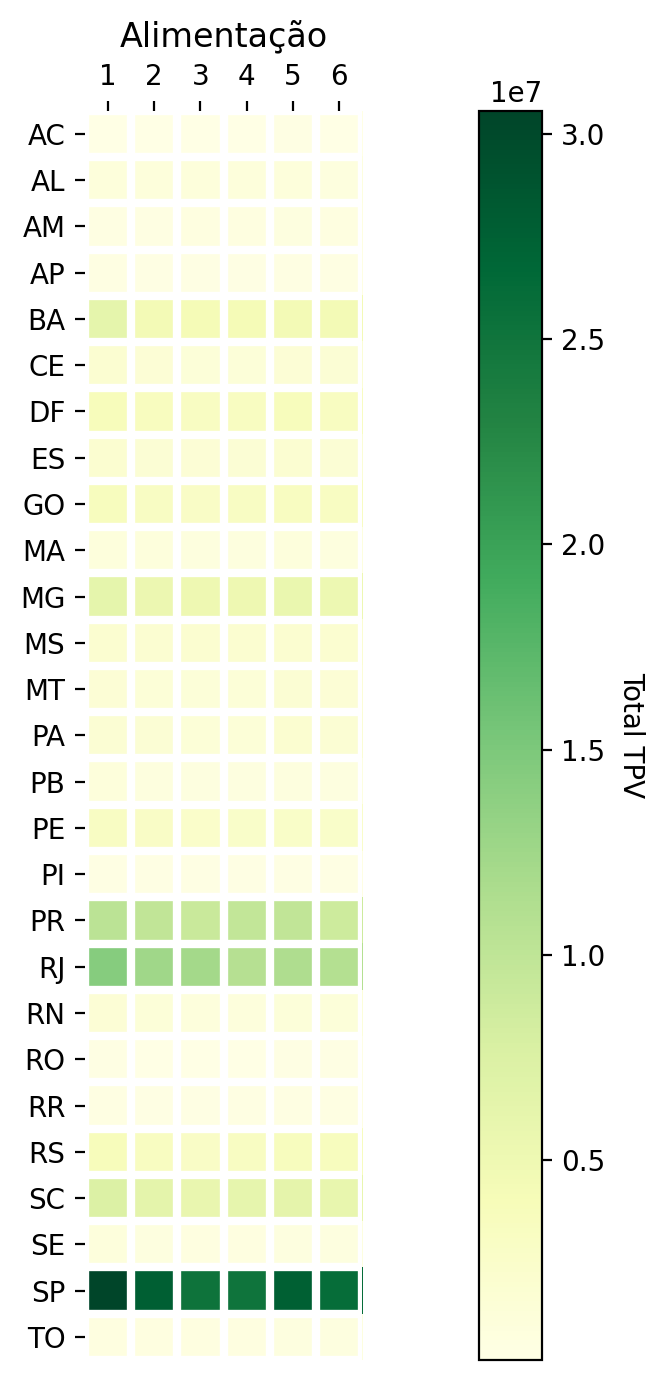

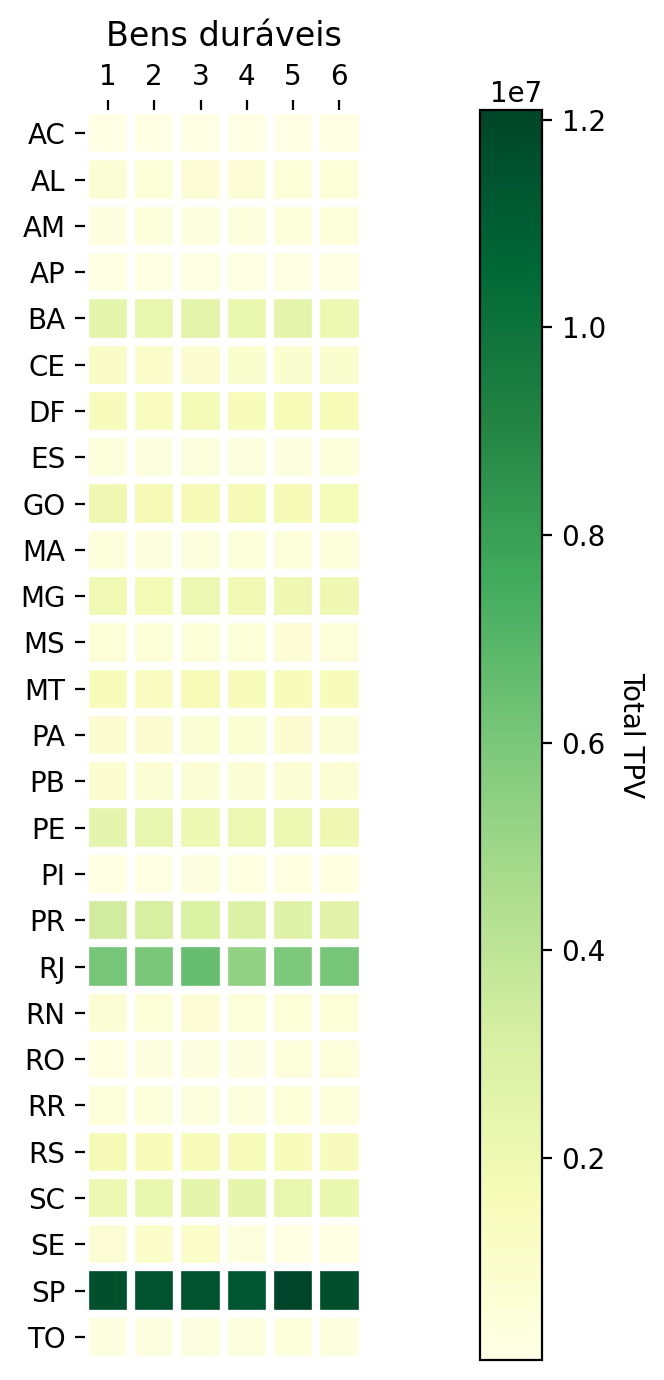

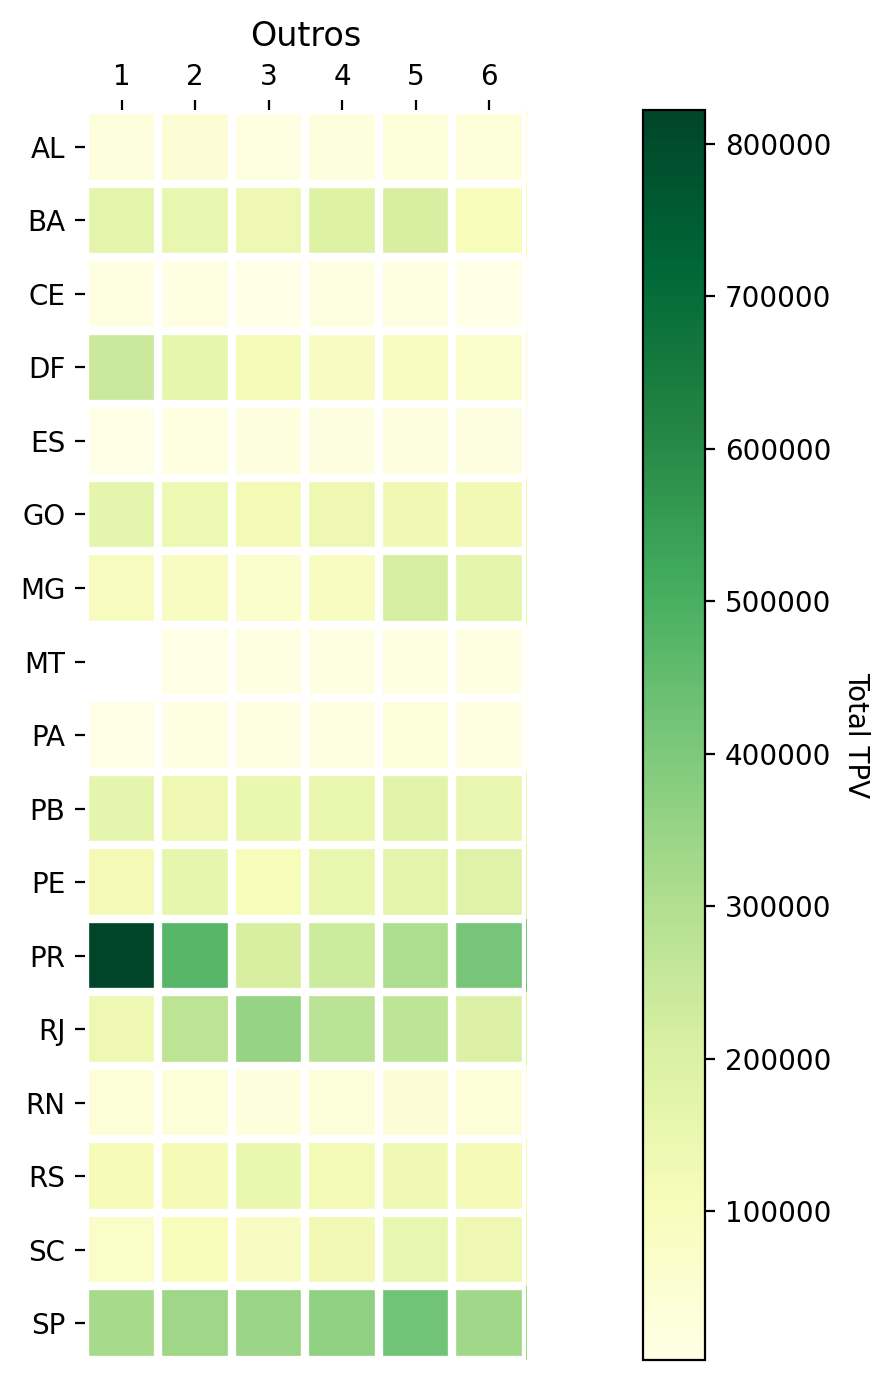

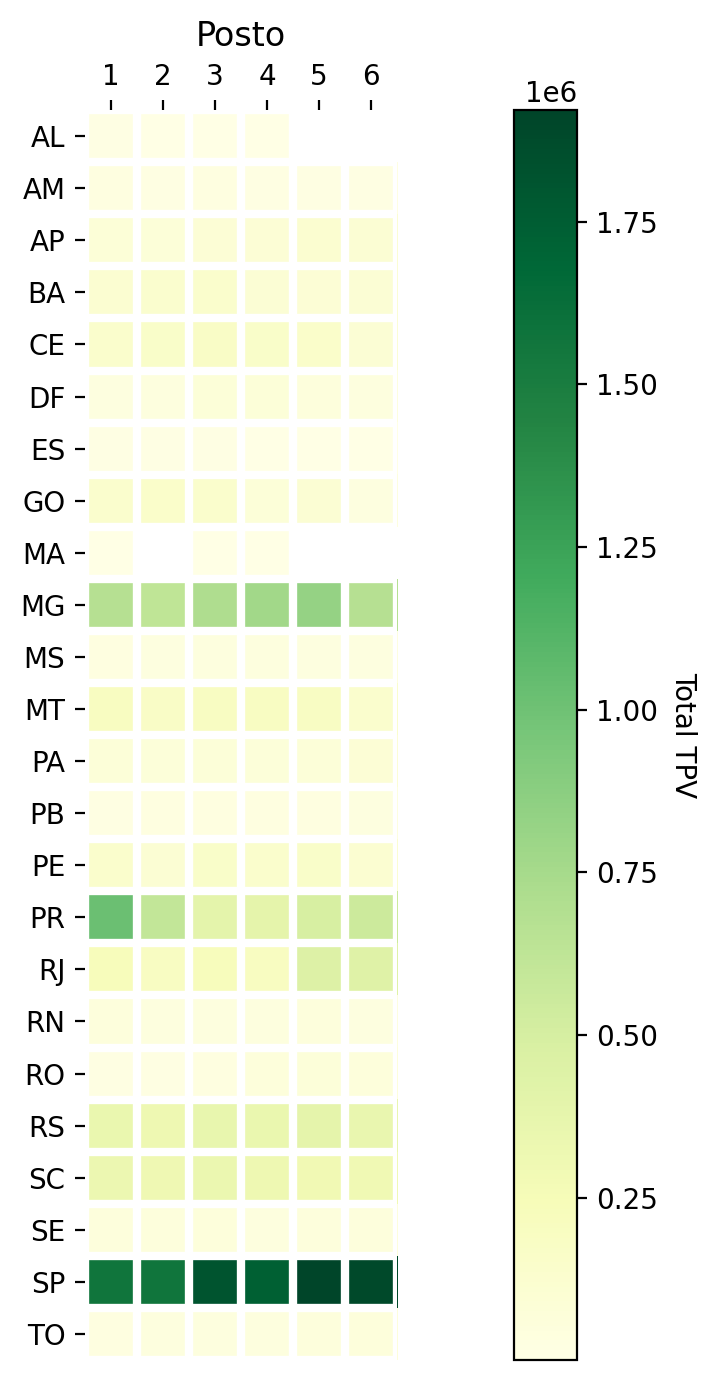

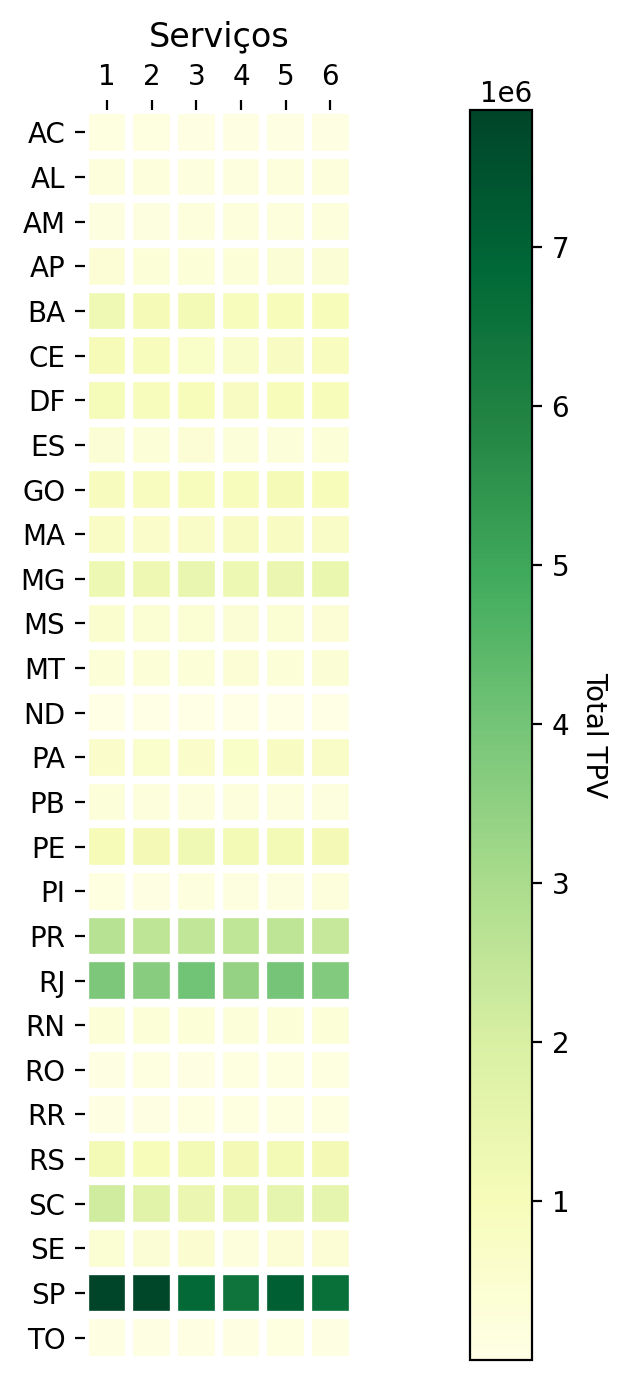

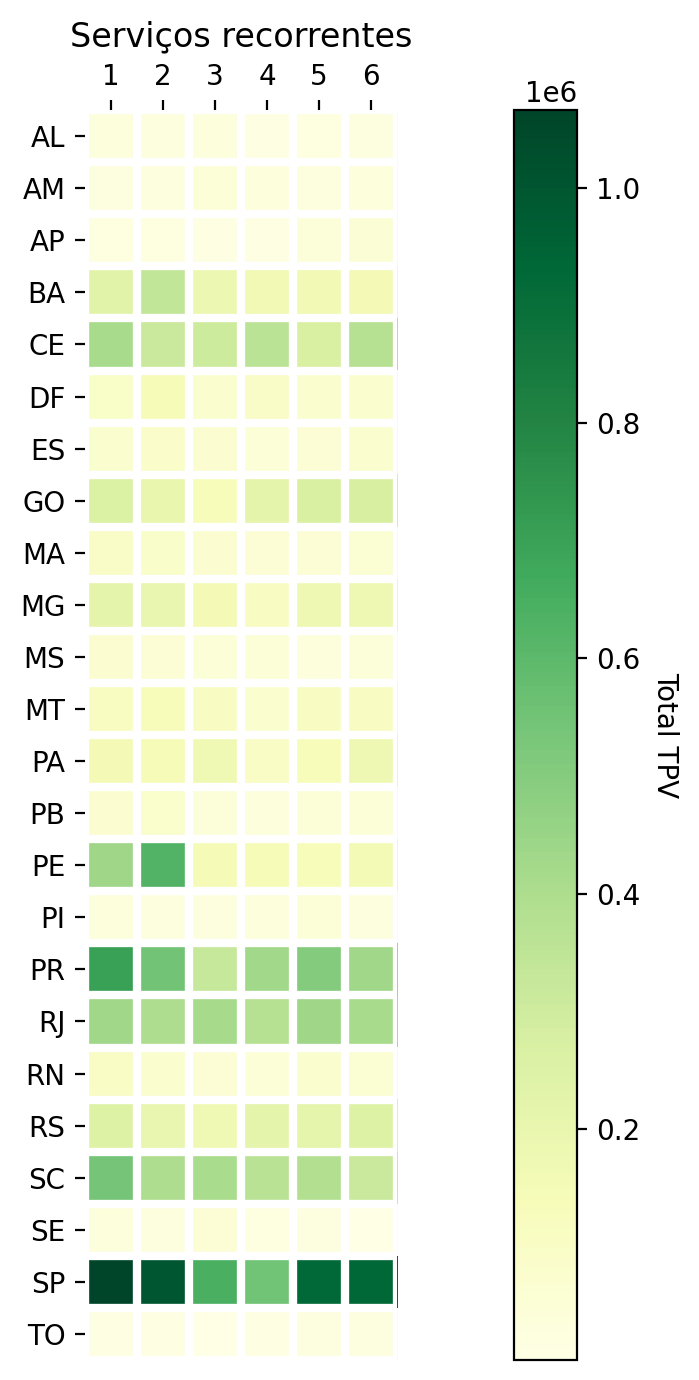

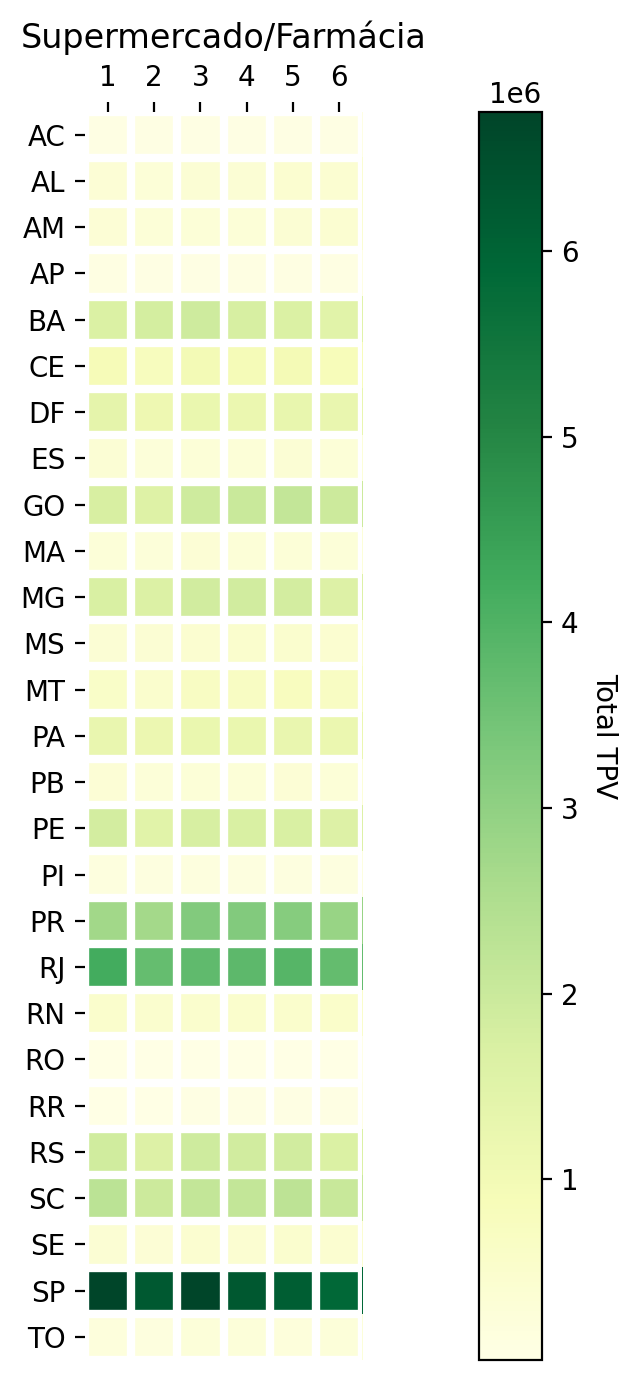

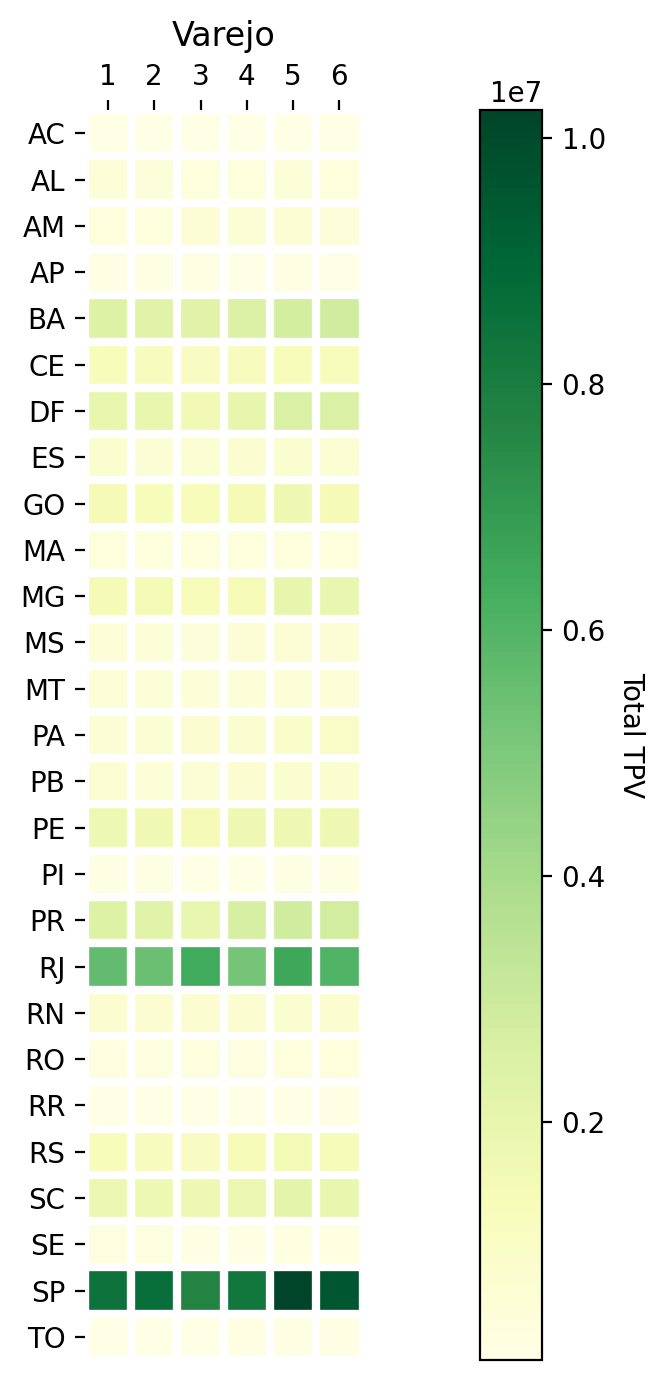

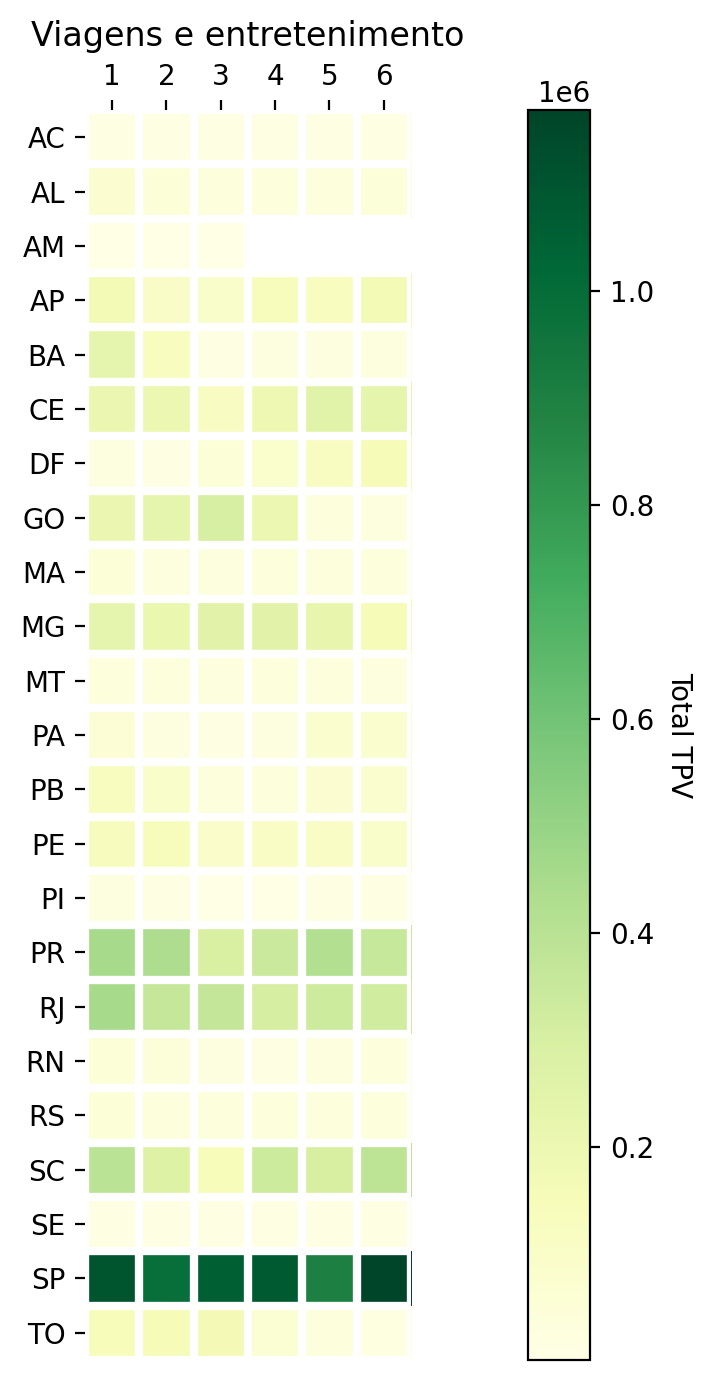

In [19]:
segmentos = list(df["segmento"].unique())
monhts = [1, 2, 3, 4, 5, 6]

for segmento in segmentos:
    df_segmento = df[(df["year"] == 2021) & (df["segmento"] == segmento)]
    estados = list(df_segmento["estado"].unique())

    df_heatmap = df_segmento.drop(["segmento"], axis=1).pivot_table(
        values="sum", index=["estado"], columns=["month"]
    )

    fig, ax = plt.subplots()

    im, cbar = plot.heatmap(
        df_heatmap, estados, monhts, ax=ax, cmap="YlGn", cbarlabel="Total TPV"
    )

    # Number of accent colors in the color scheme
    plt.title(segmento)
    fig.tight_layout()
    plt.show()

### 2020 - Segmentos

In [20]:
tpv_merged["dt_transacao"] = pd.to_datetime(tpv_merged["dt_transacao"], format="%Y%m%d")
tpv_merged["month"] = tpv_merged["dt_transacao"].dt.month
tpv_merged["year"] = tpv_merged["dt_transacao"].dt.year

# grouping
df = (
    tpv_merged.groupby(["segmento", "estado", "year", "month"])["vlr_tpv"]
    .agg(["sum"])
    .reset_index()
)

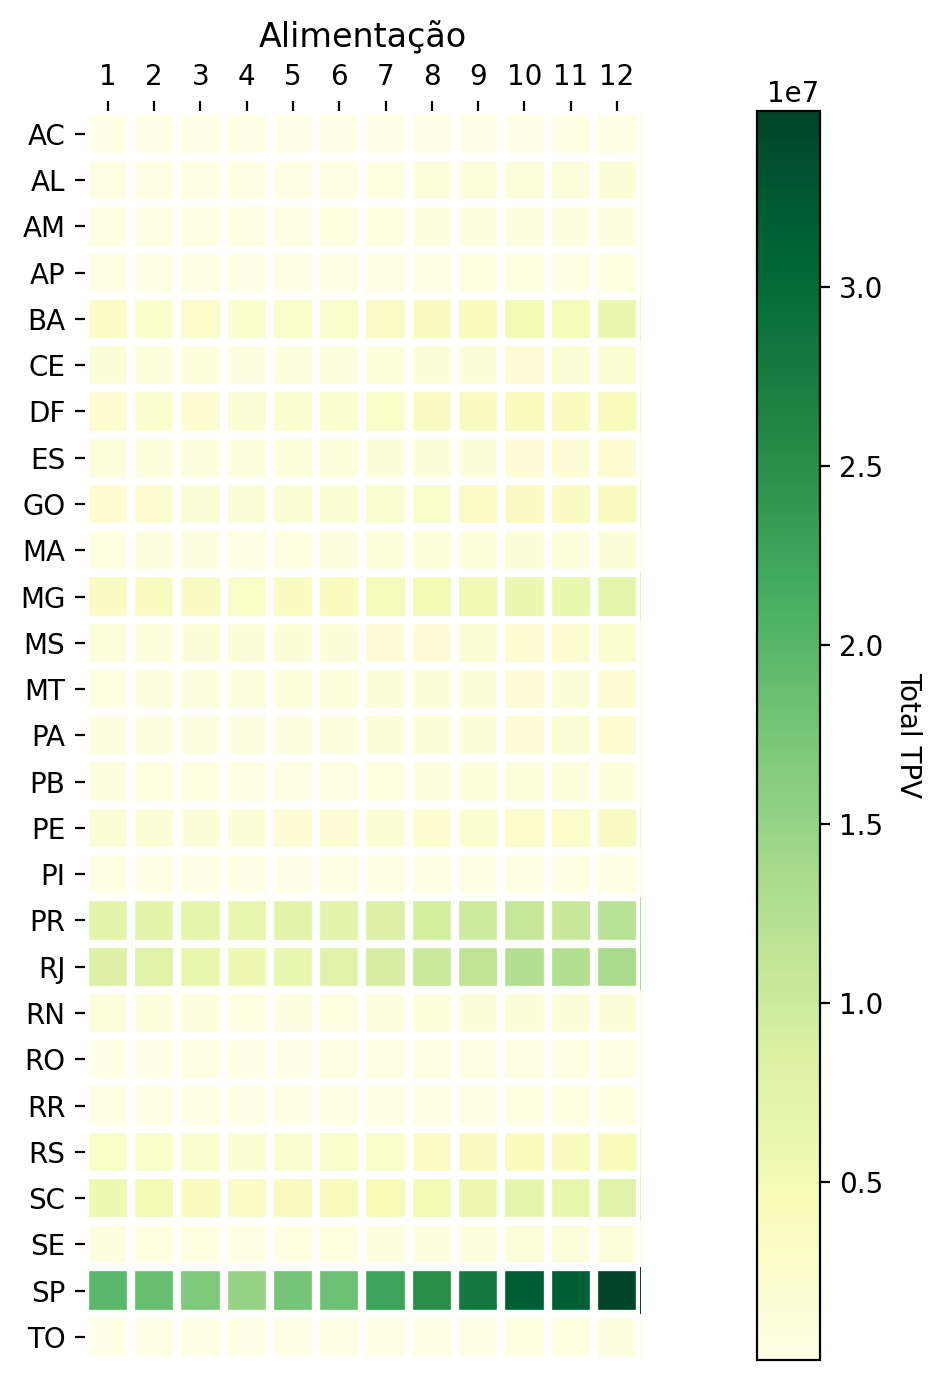

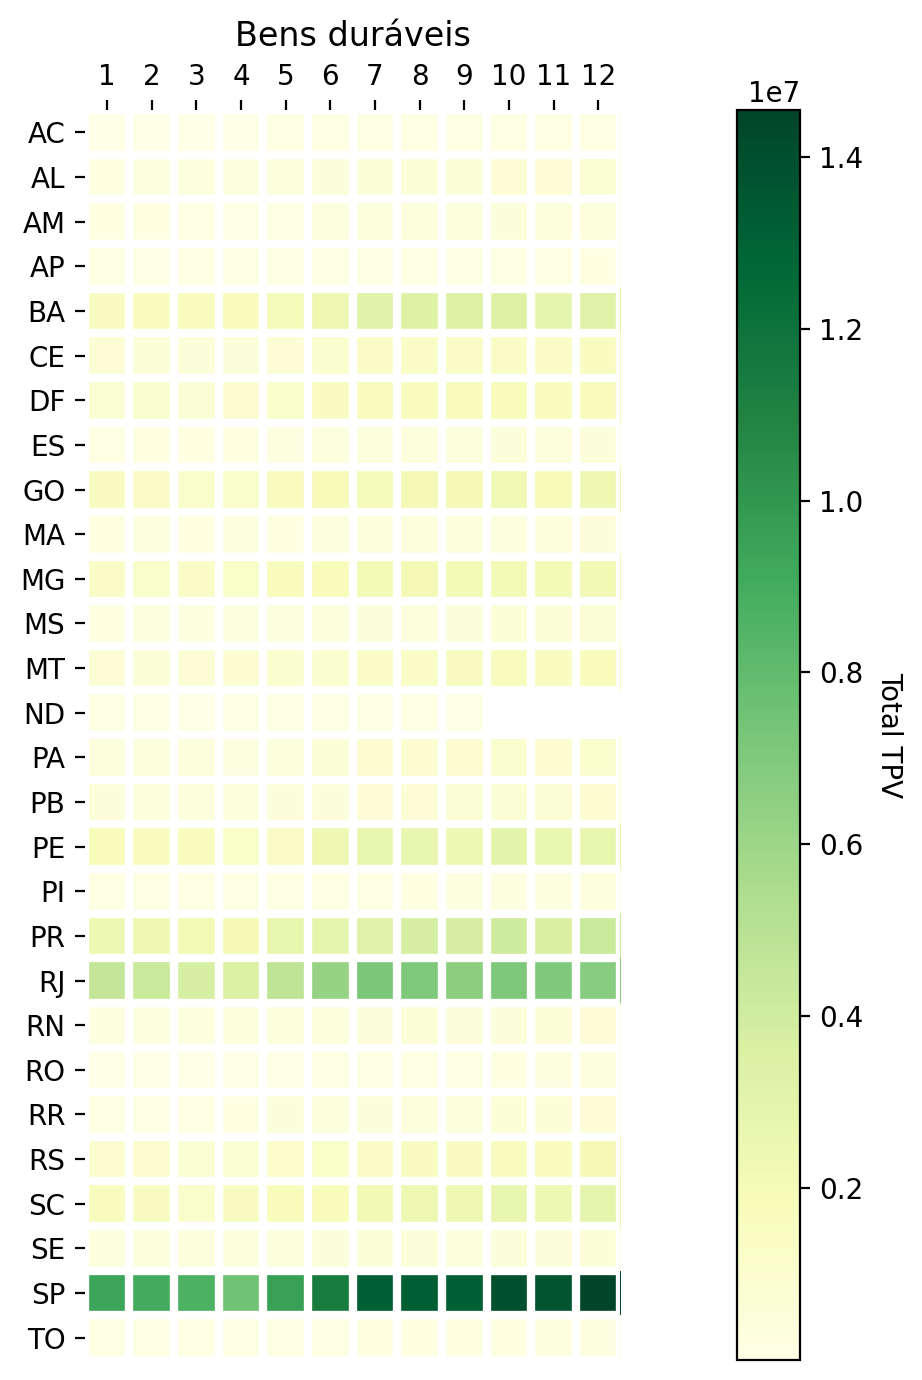

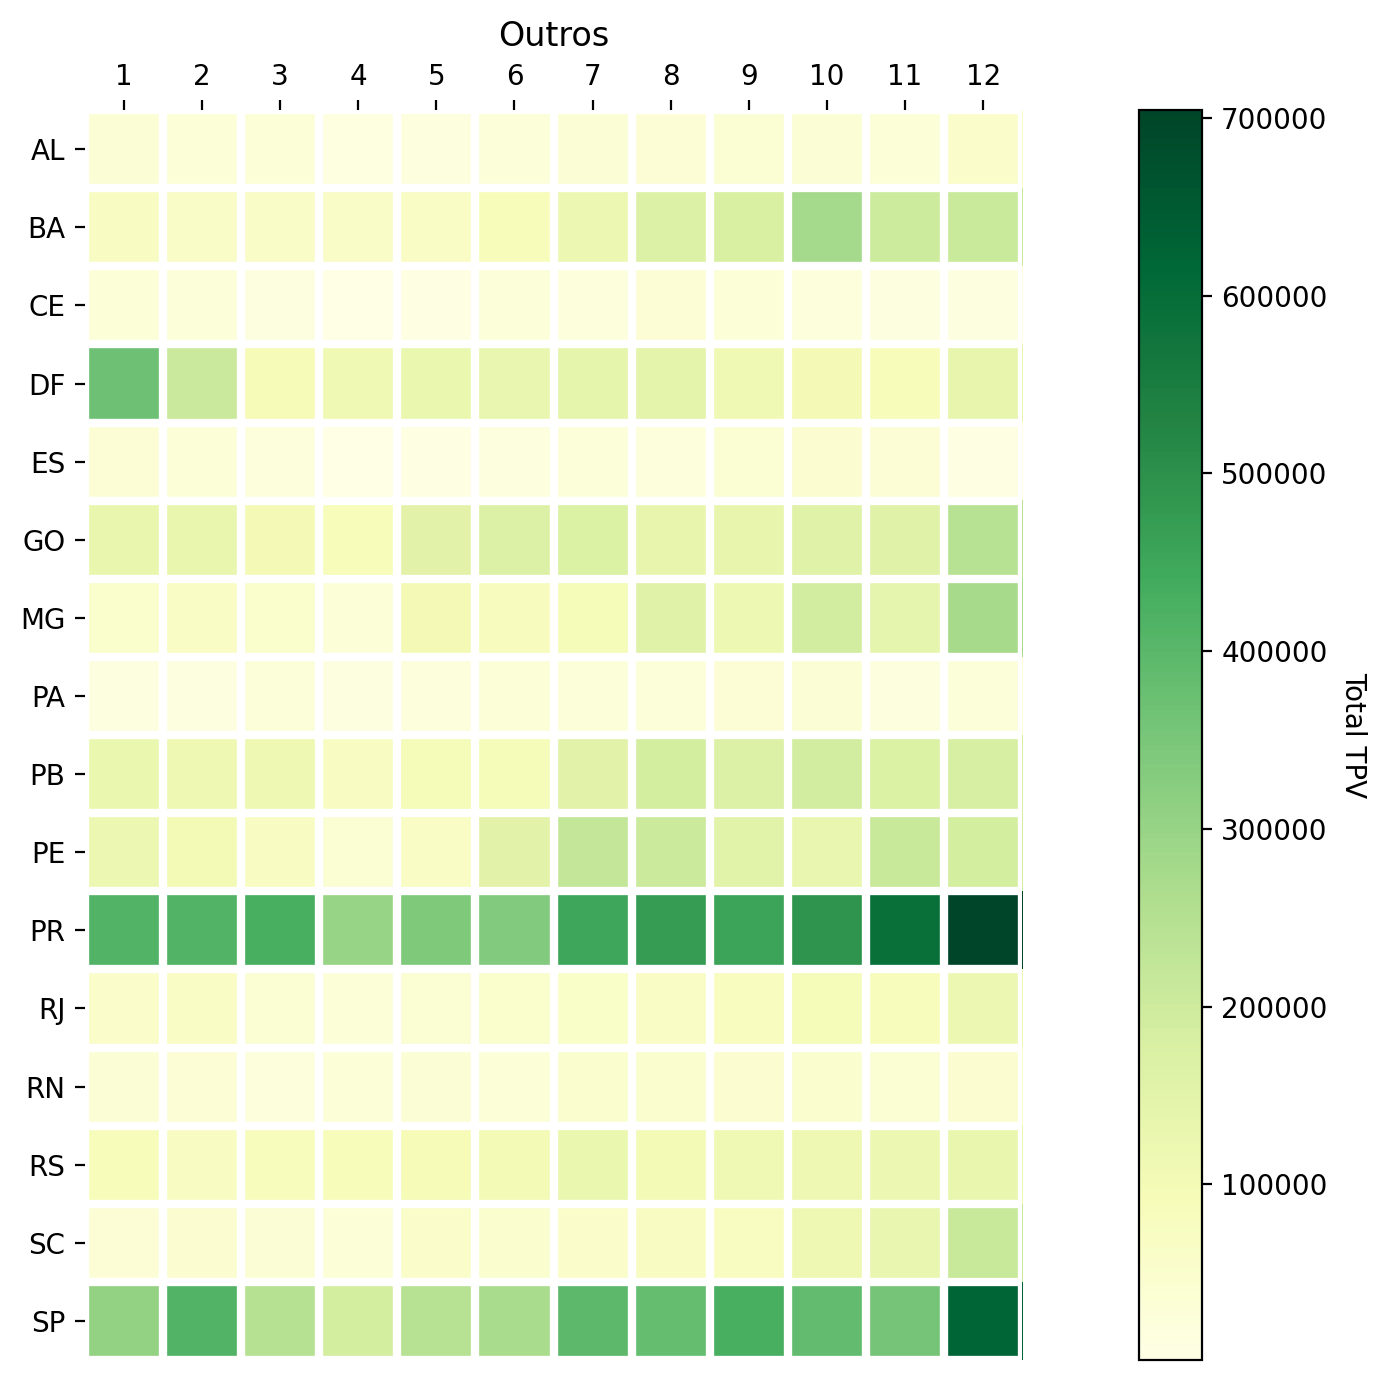

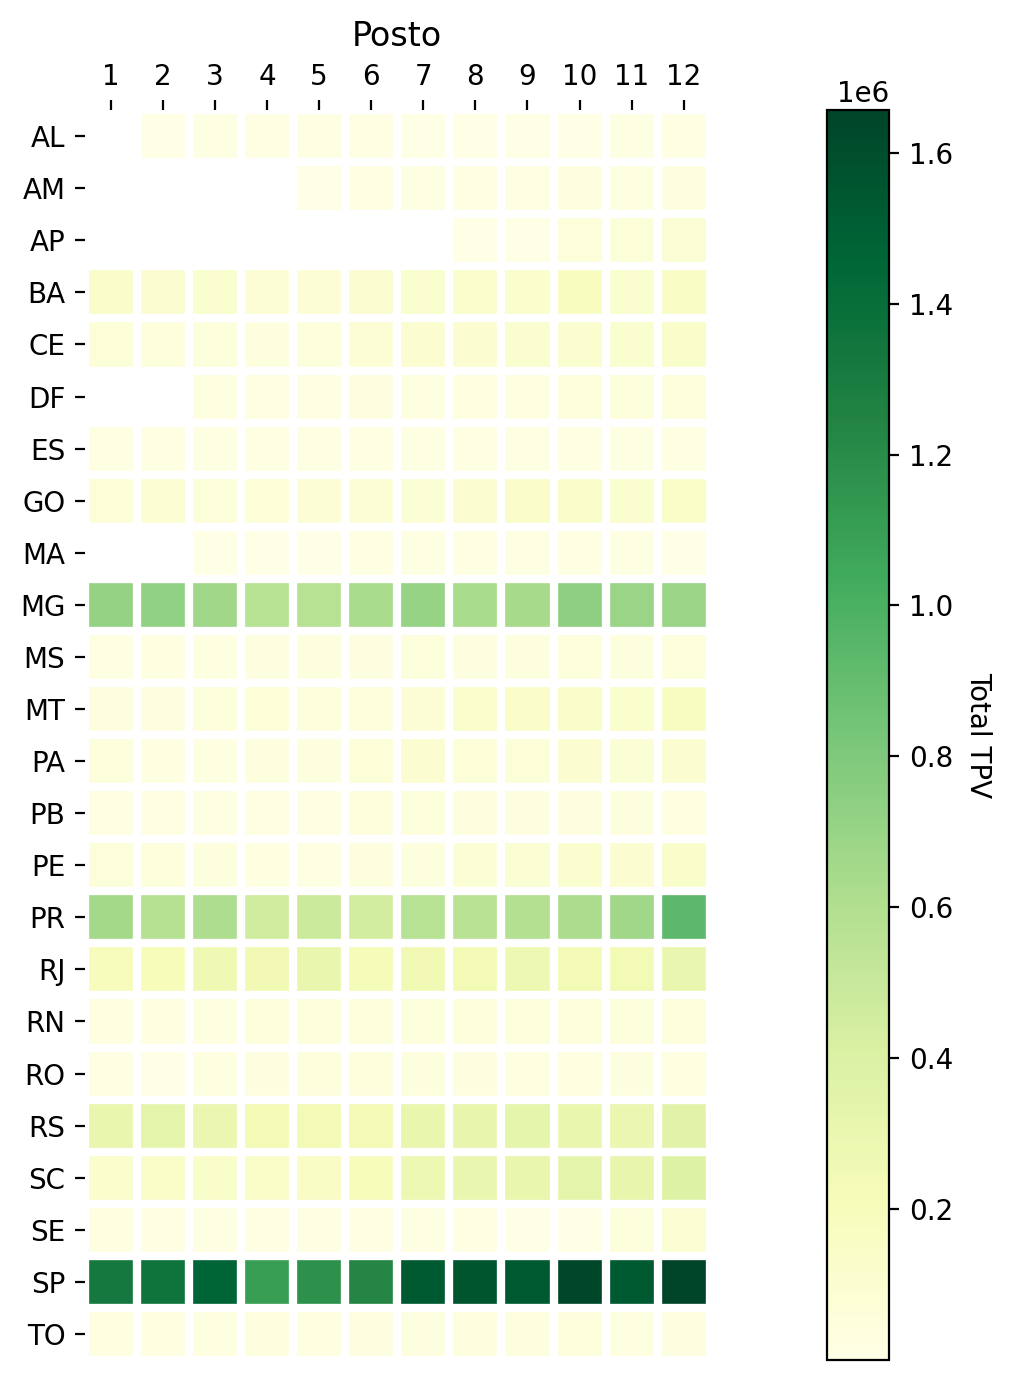

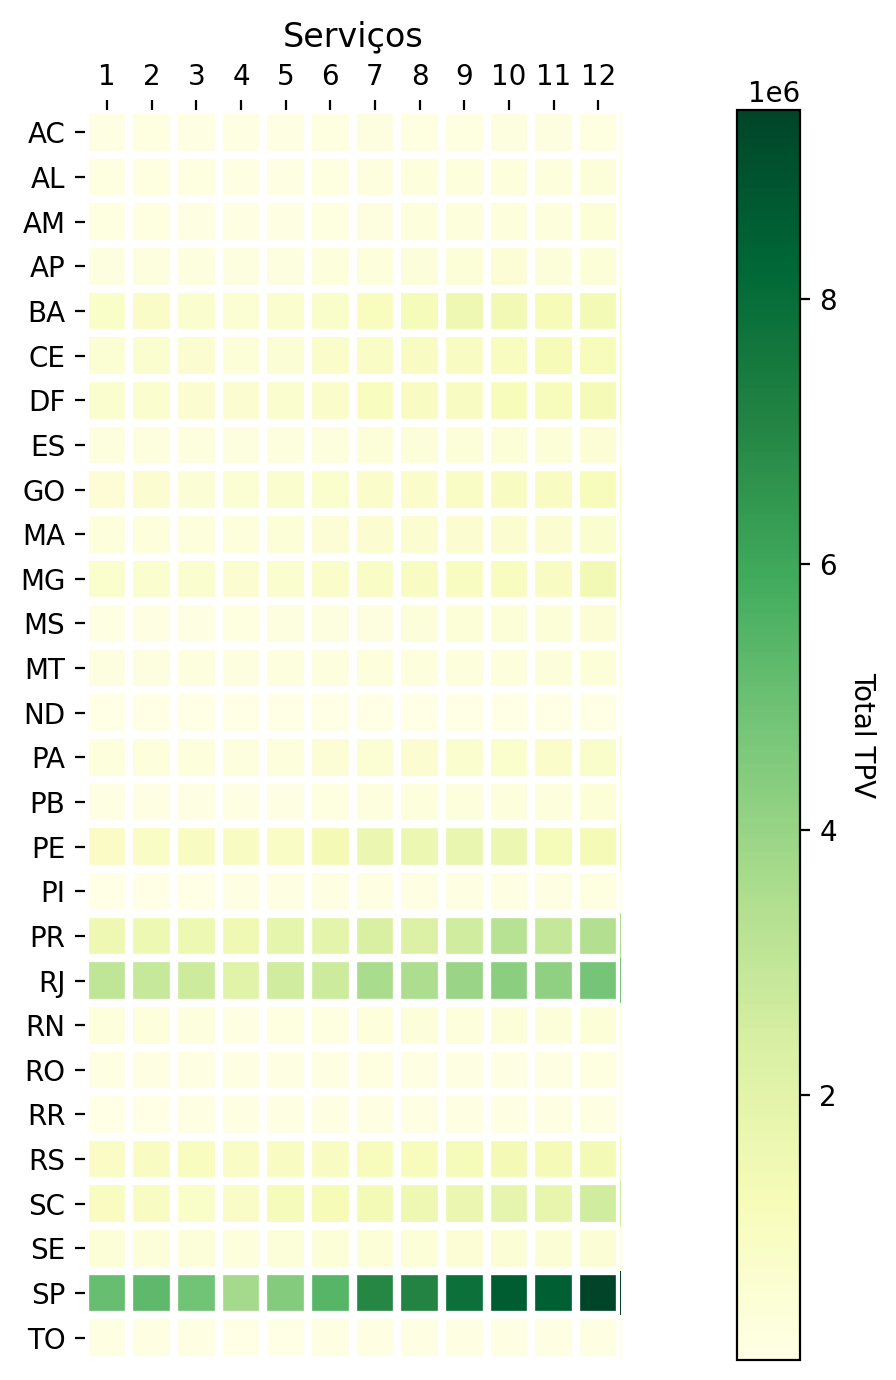

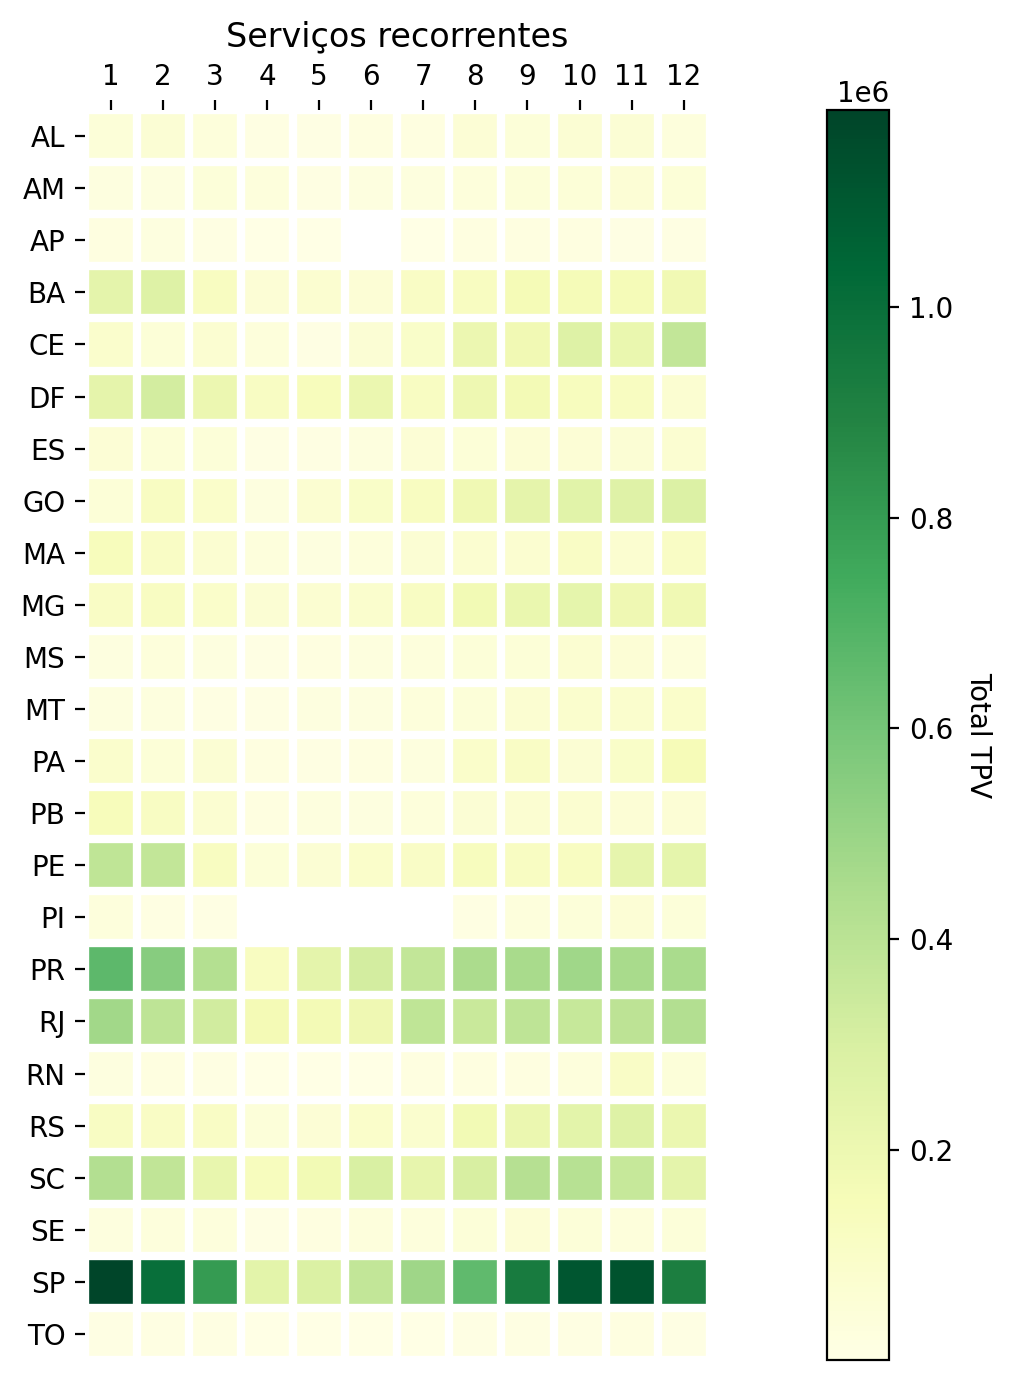

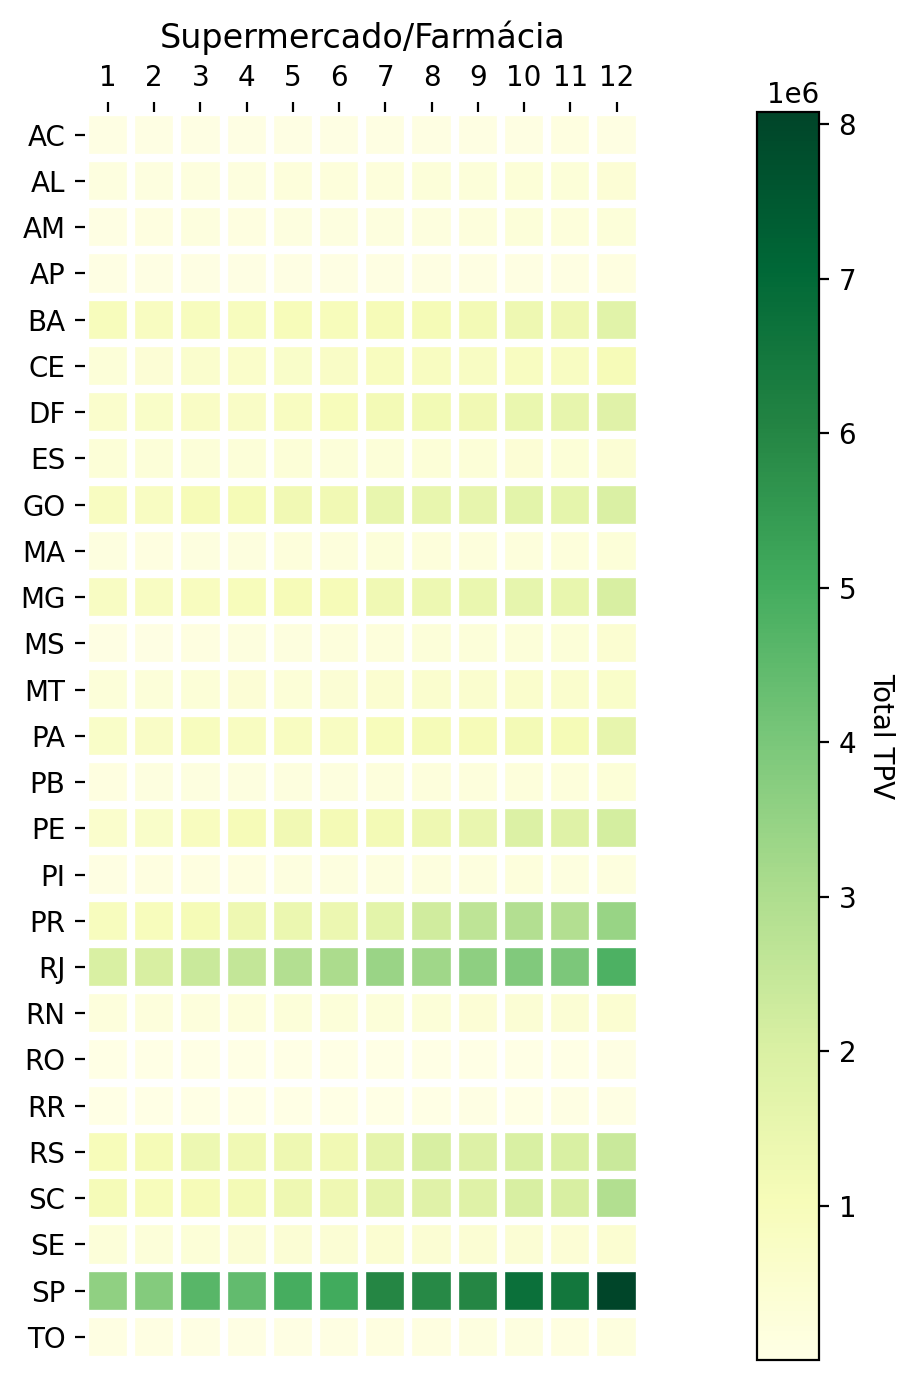

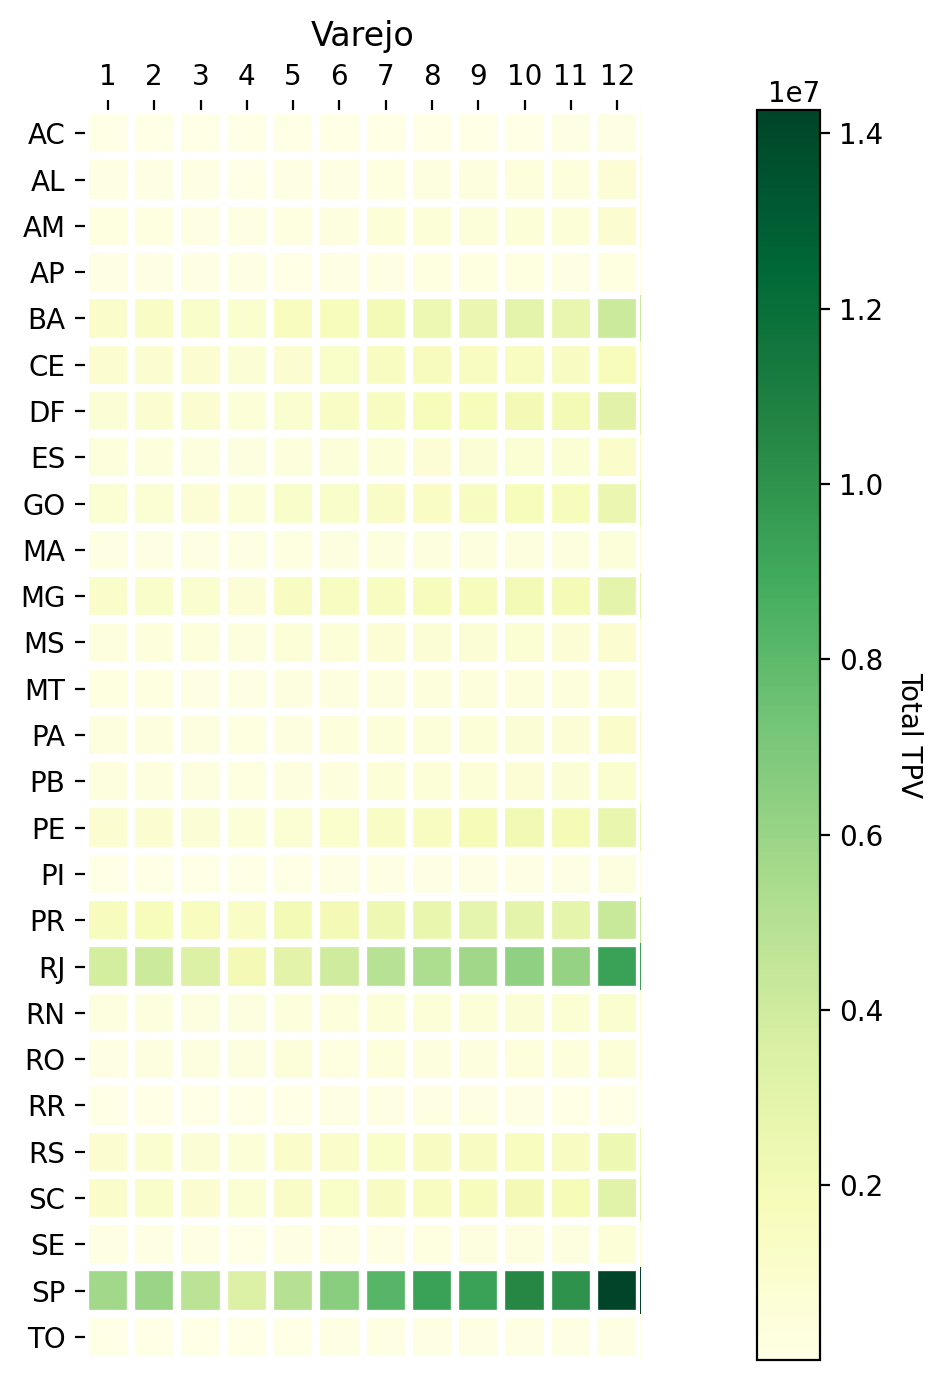

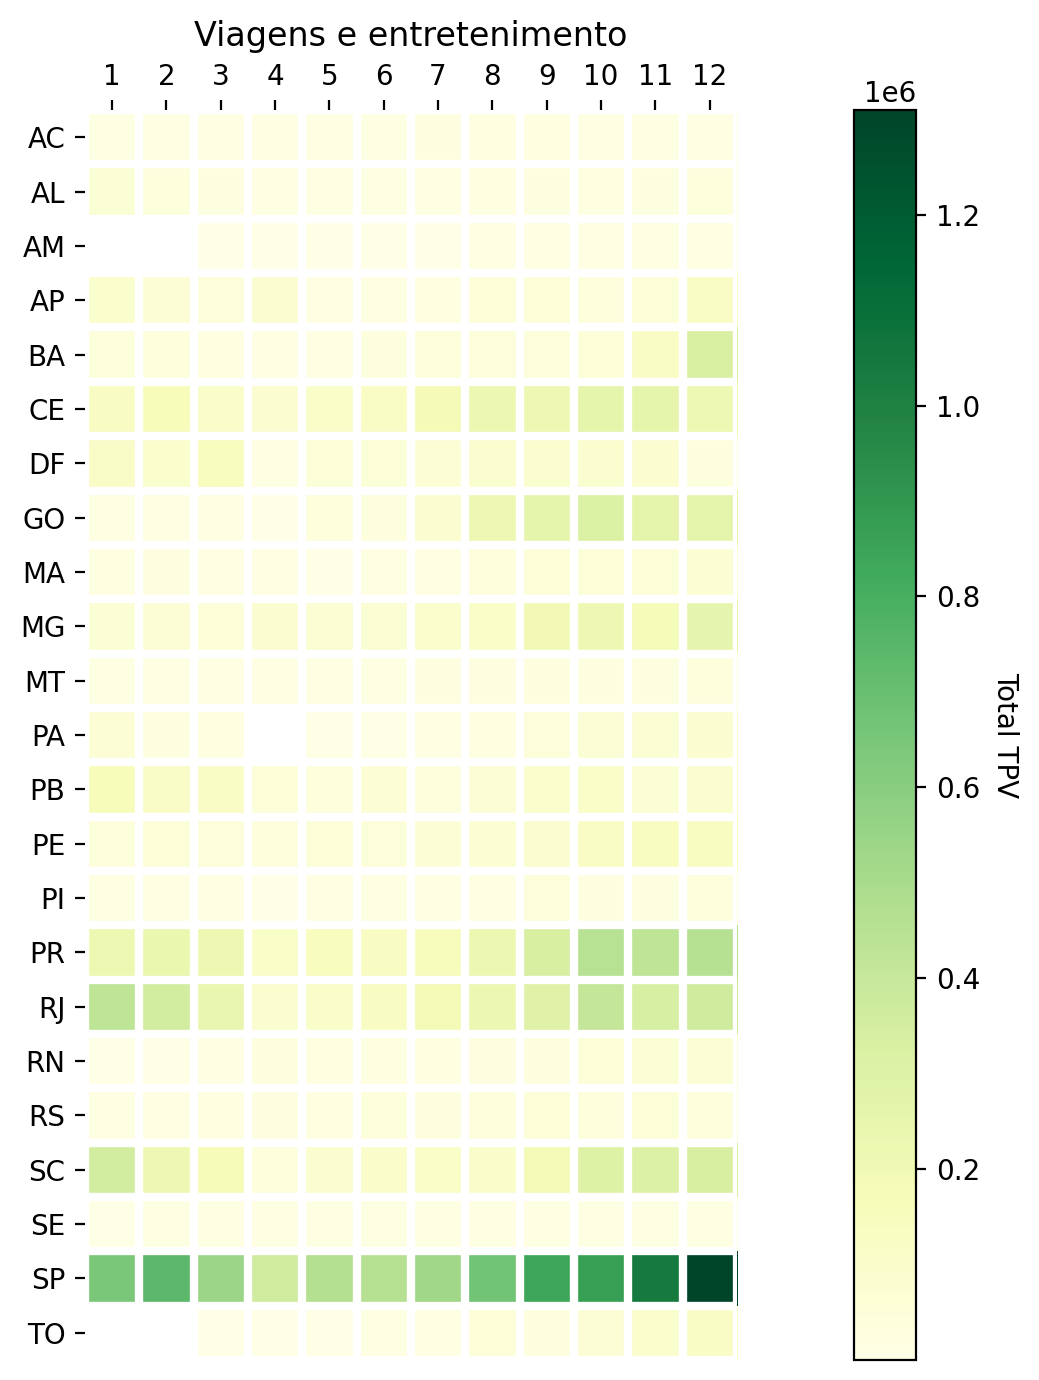

In [21]:
segmentos = list(df["segmento"].unique())
monhts = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for segmento in segmentos:
    df_segmento = df[(df["year"] == 2020) & (df["segmento"] == segmento)]
    estados = list(df_segmento["estado"].unique())

    df_heatmap = df_segmento.drop(["segmento"], axis=1).pivot_table(
        values="sum", index=["estado"], columns=["month"]
    )

    fig, ax = plt.subplots()

    im, cbar = plot.heatmap(
        df_heatmap, estados, monhts, ax=ax, cmap="YlGn", cbarlabel="Total TPV"
    )

    # Number of accent colors in the color scheme
    plt.title(segmento)
    fig.tight_layout()
    plt.show()

### 2020 - Subsegmentos

In [22]:
tpv_merged["dt_transacao"] = pd.to_datetime(tpv_merged["dt_transacao"], format="%Y%m%d")
tpv_merged["month"] = tpv_merged["dt_transacao"].dt.month
tpv_merged["year"] = tpv_merged["dt_transacao"].dt.year

# grouping
df = (
    tpv_merged.groupby(["subsegmento", "estado", "year", "month"])["vlr_tpv"]
    .agg(["sum"])
    .reset_index()
)

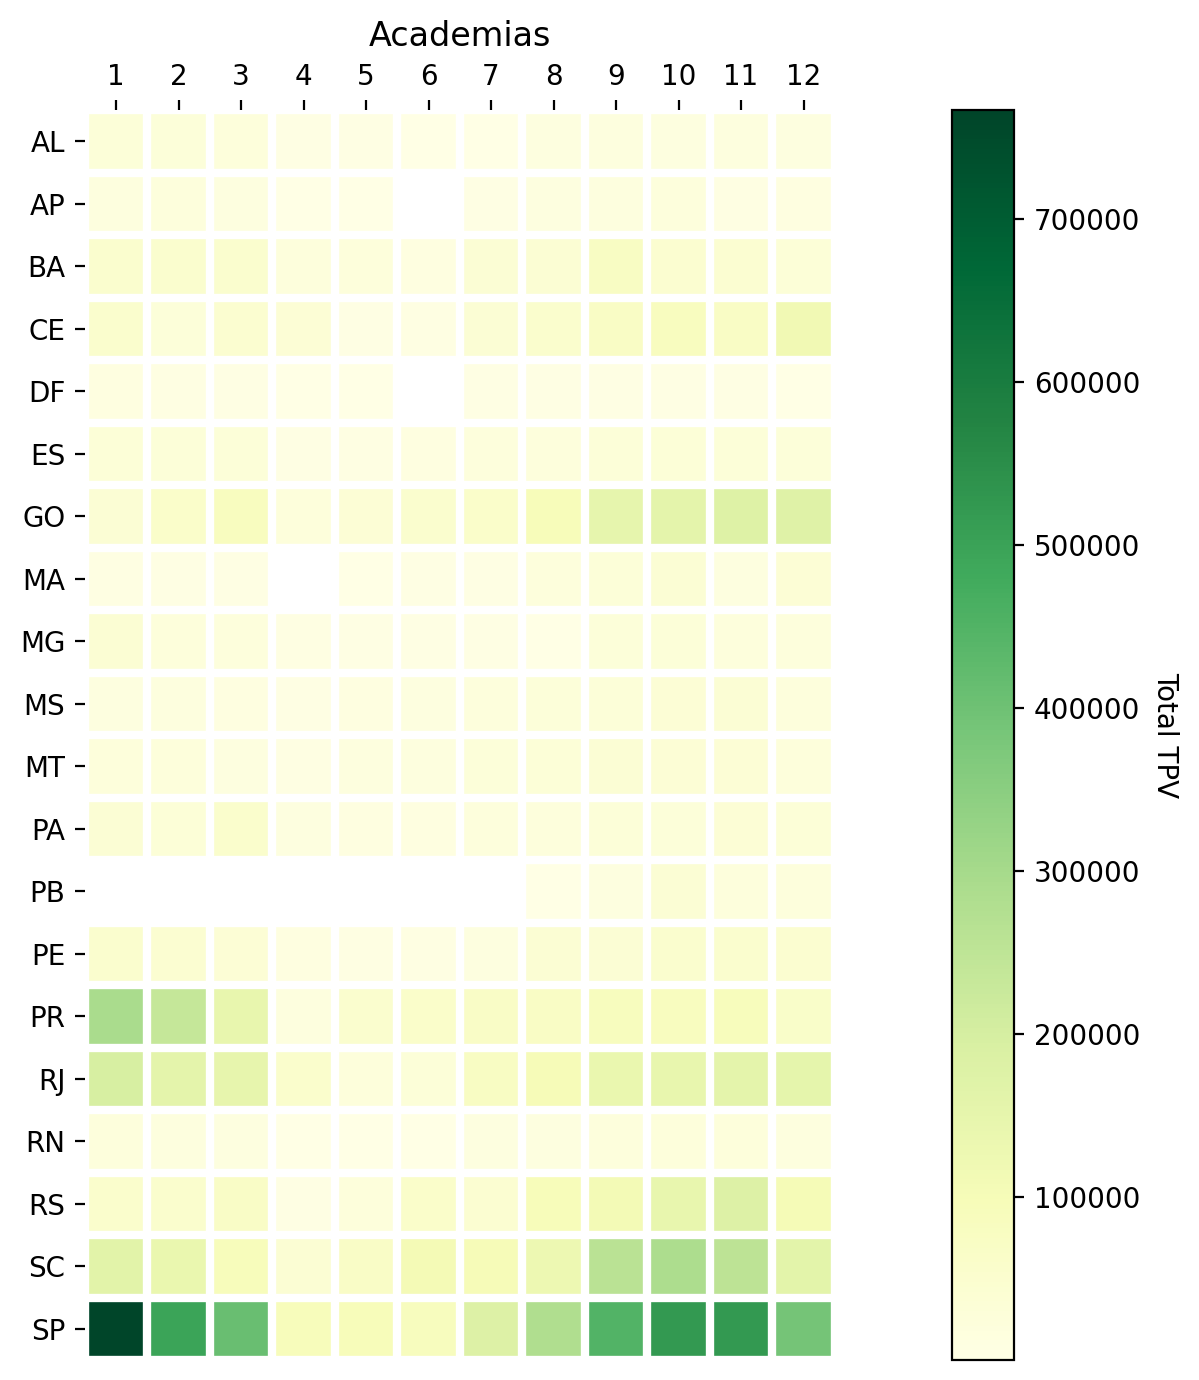

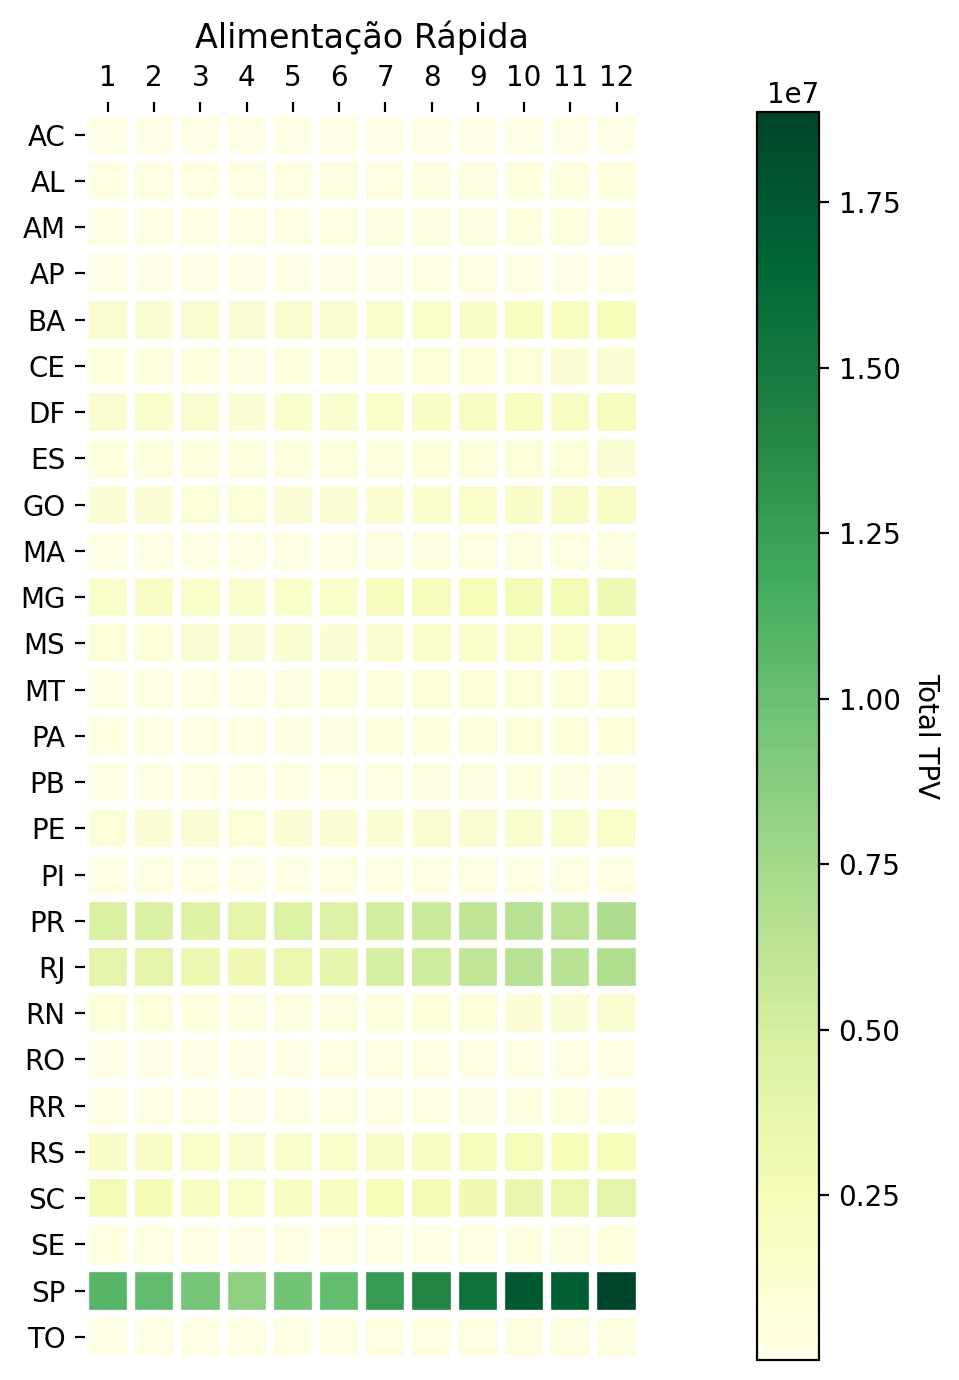

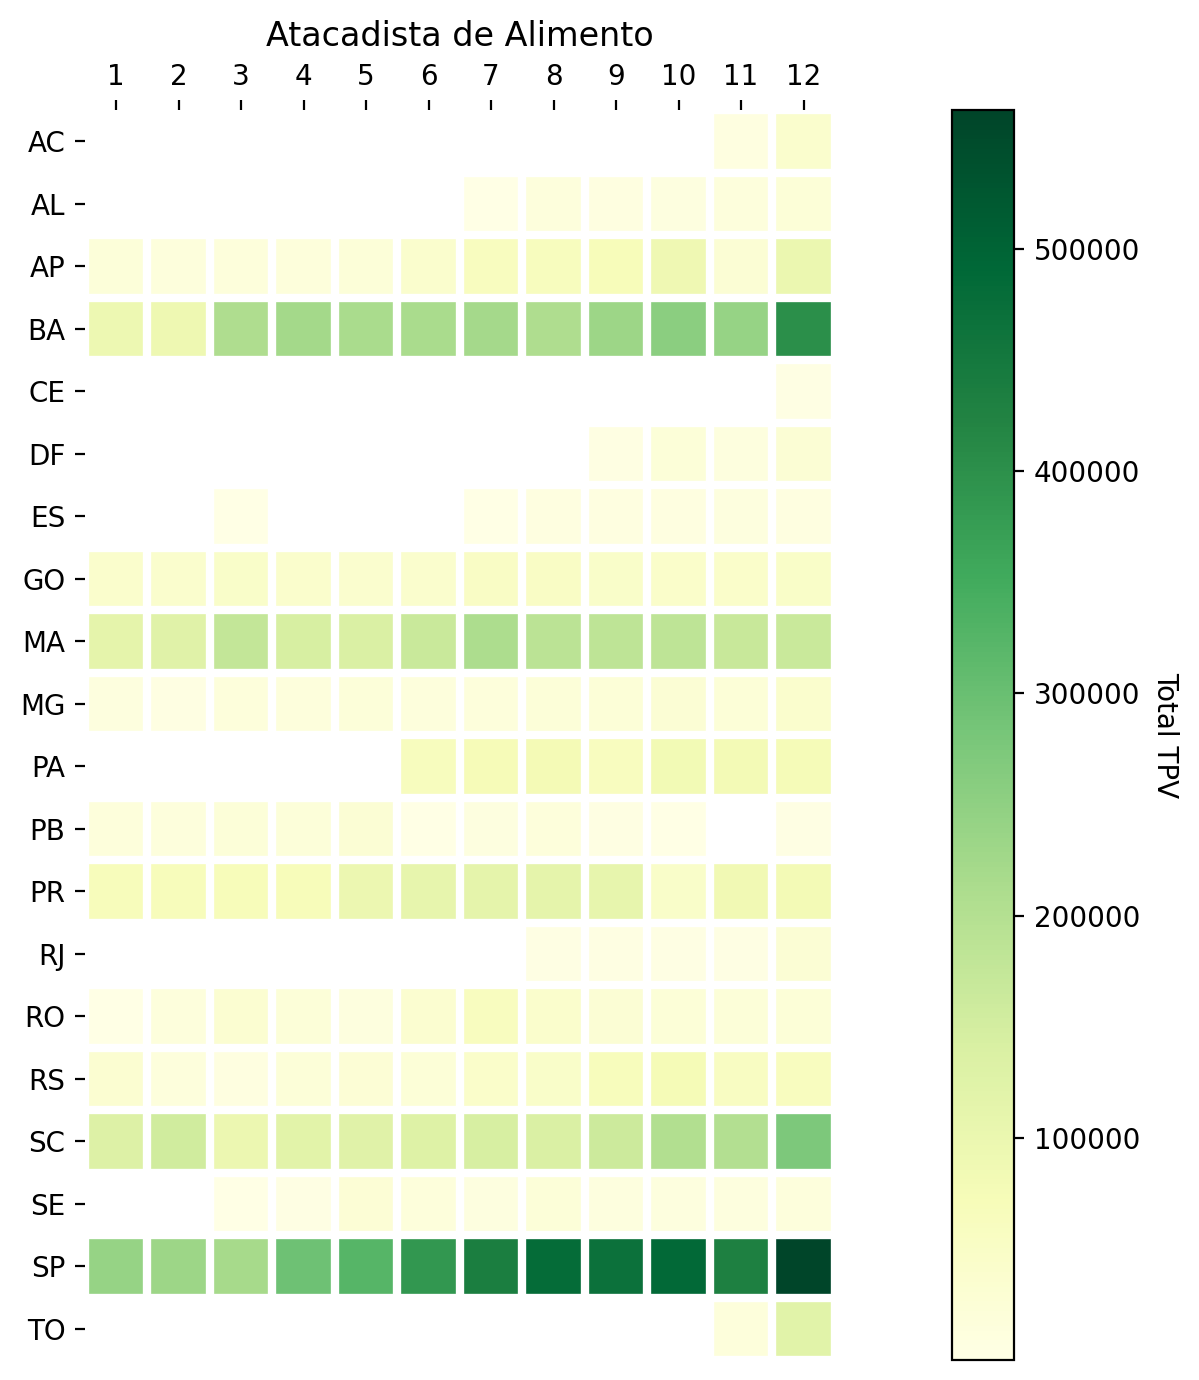

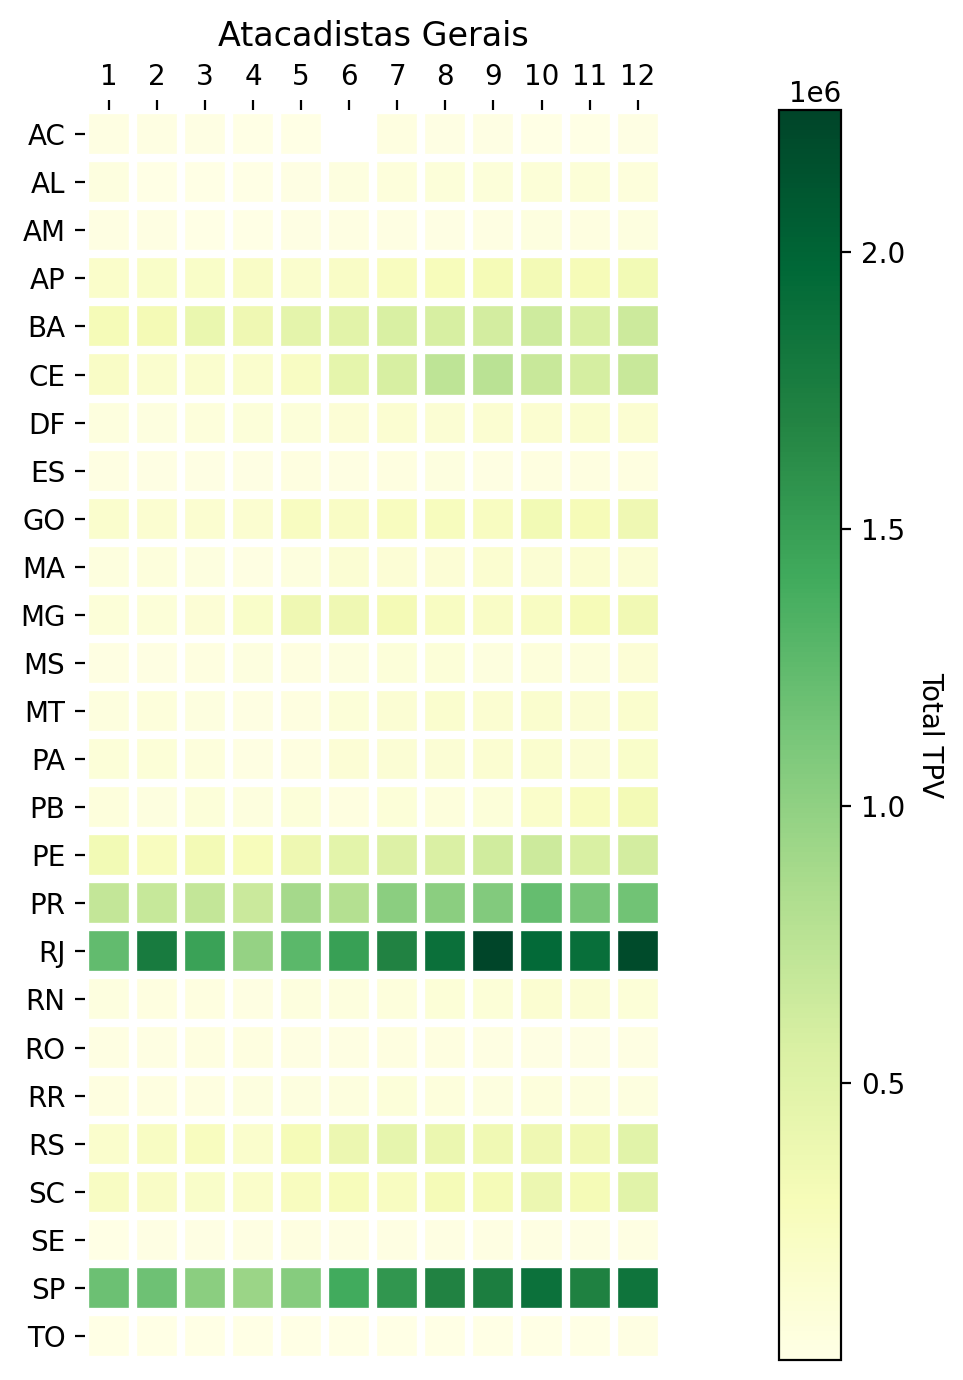

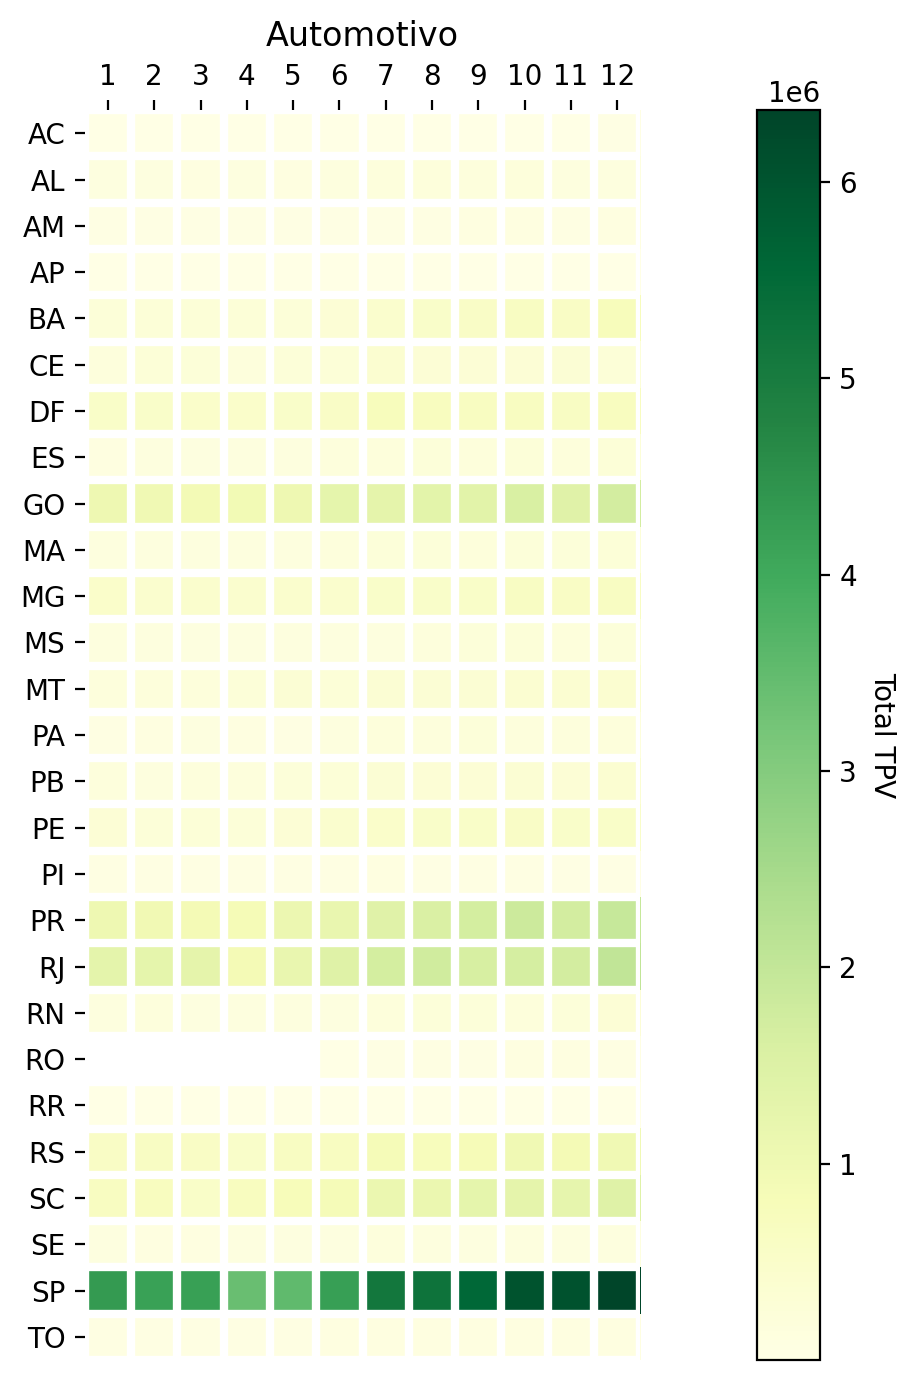

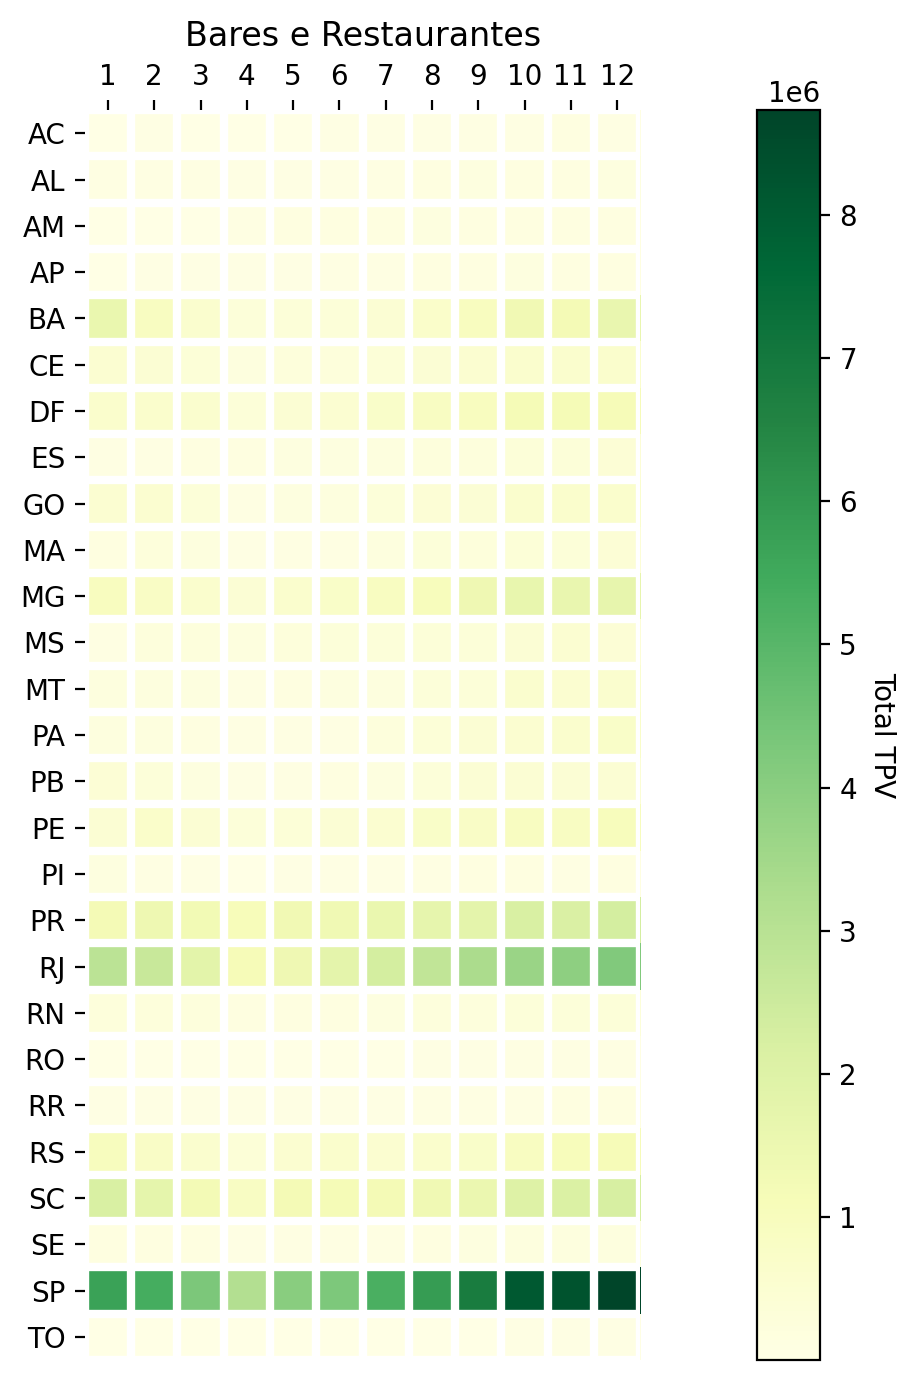

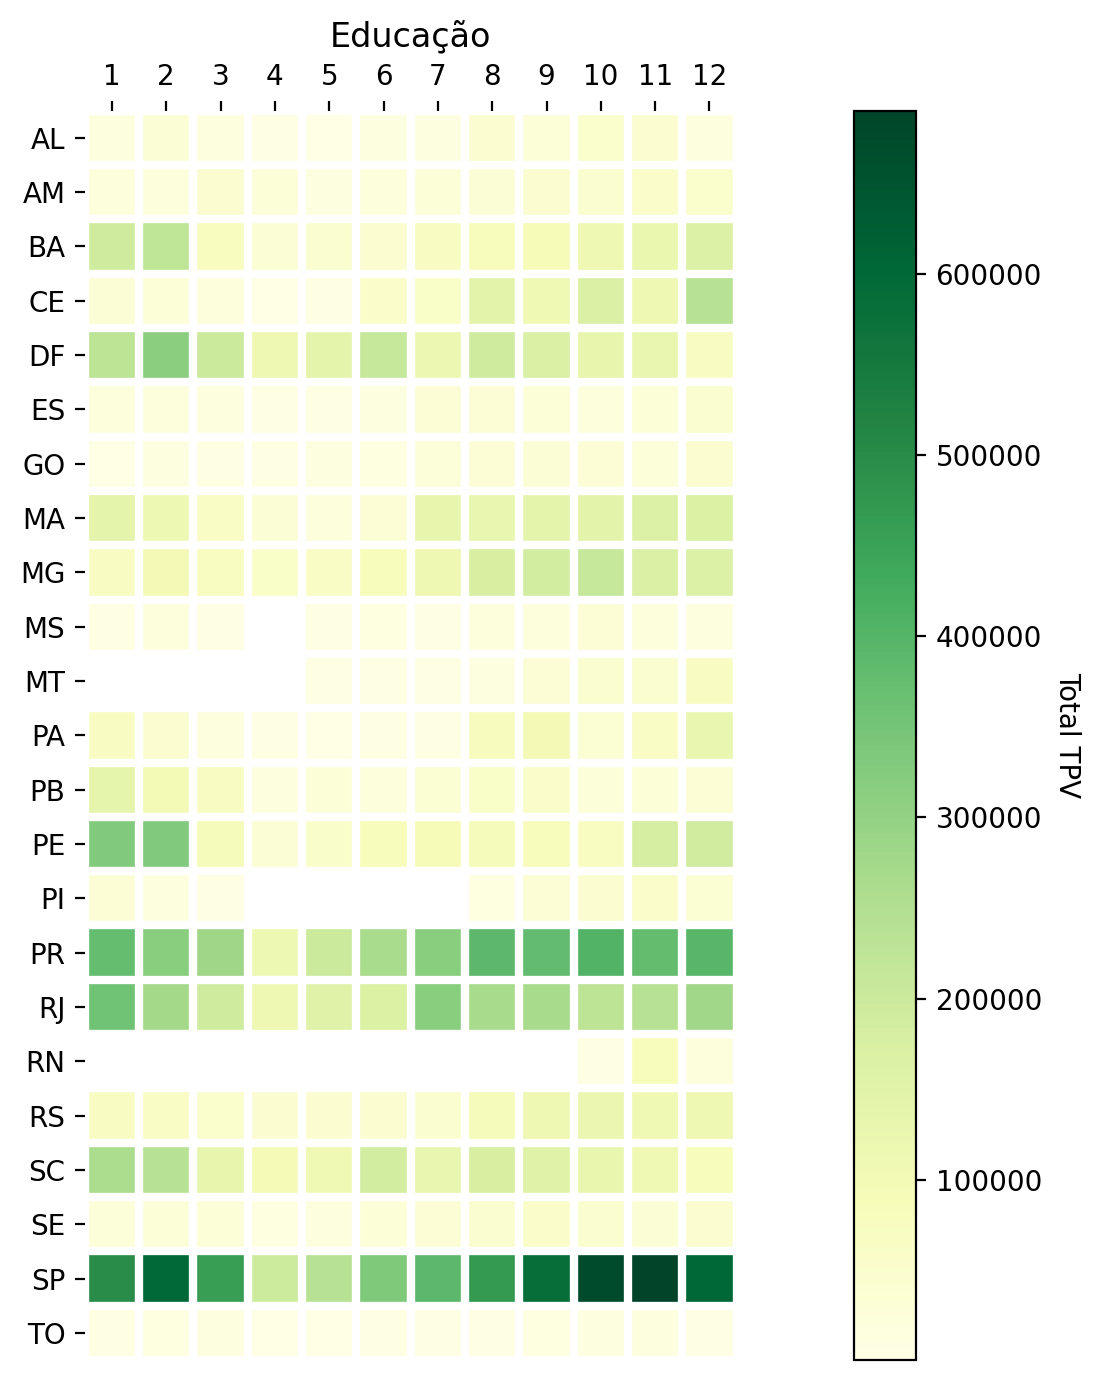

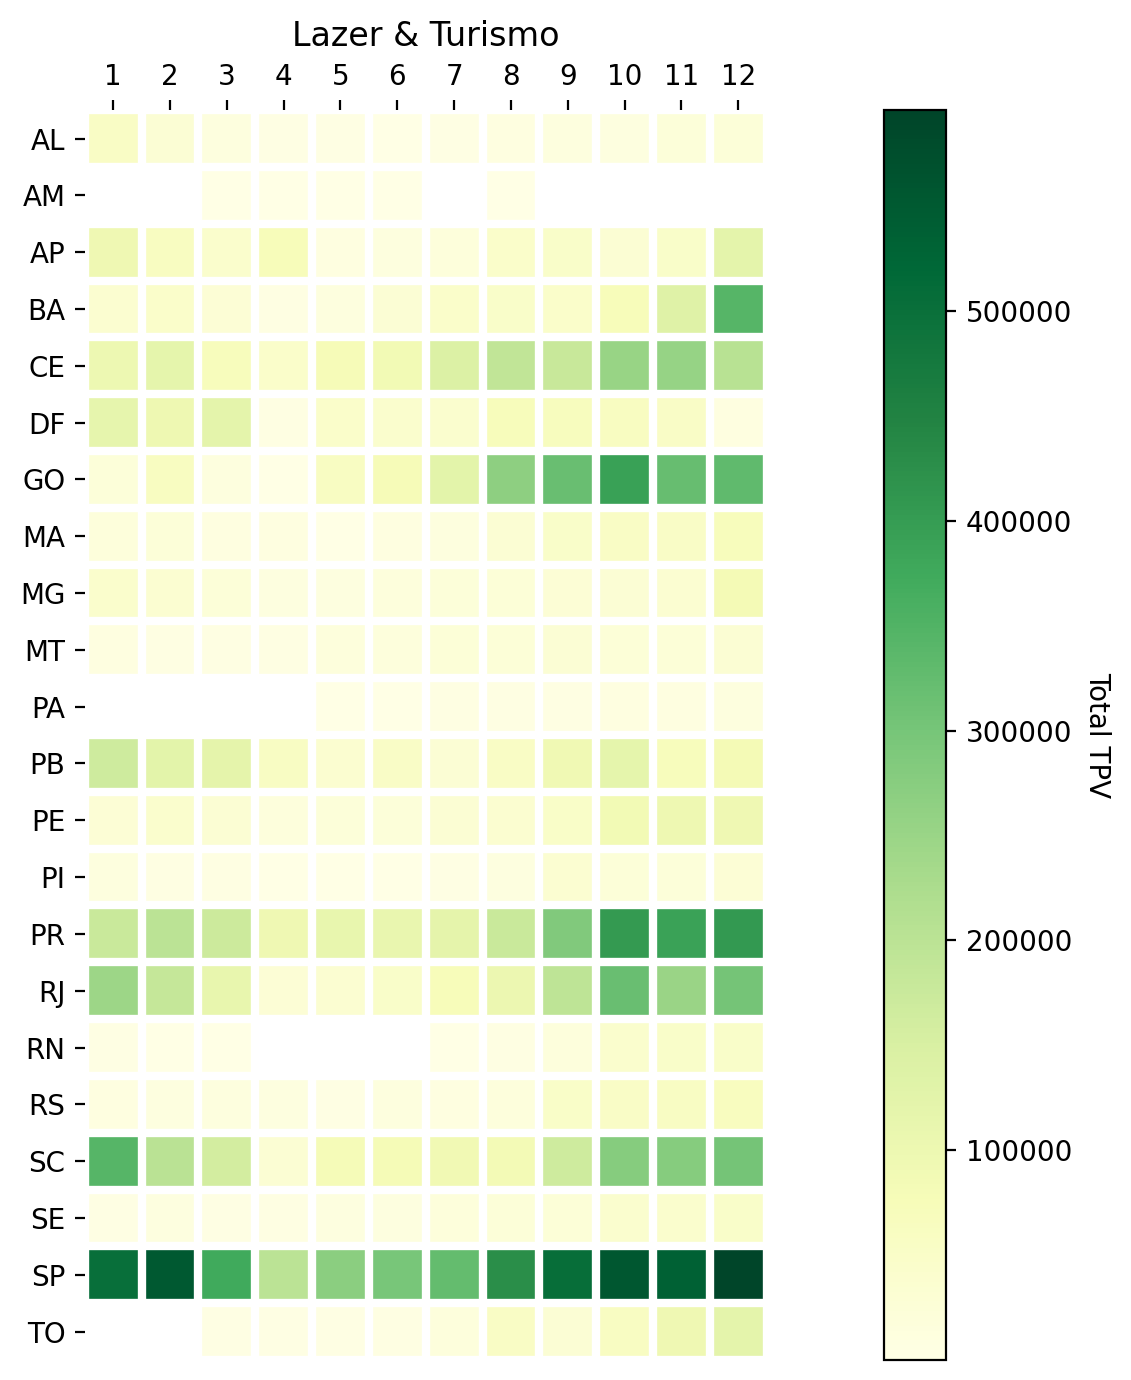

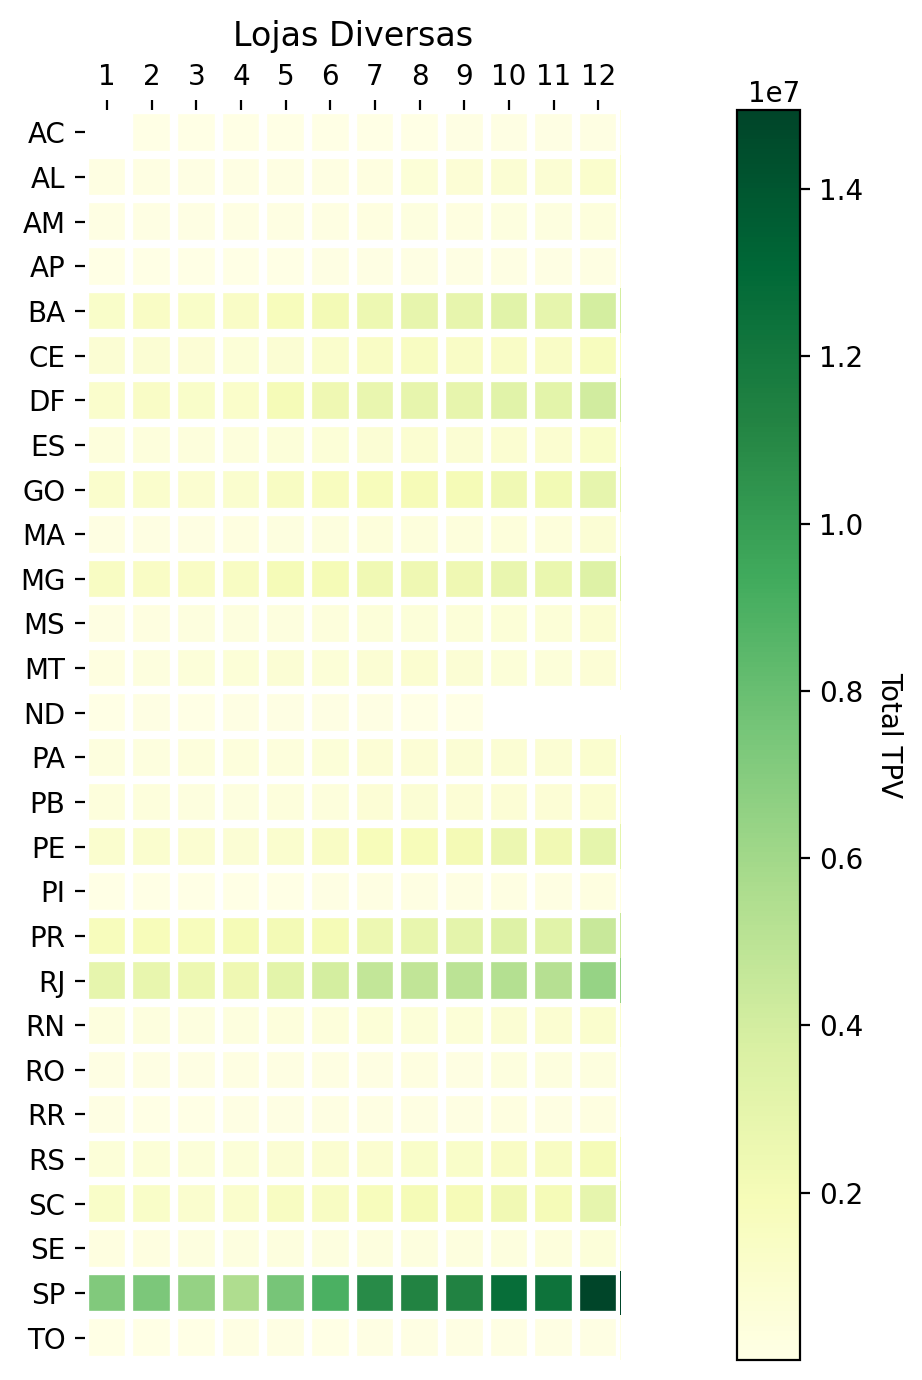

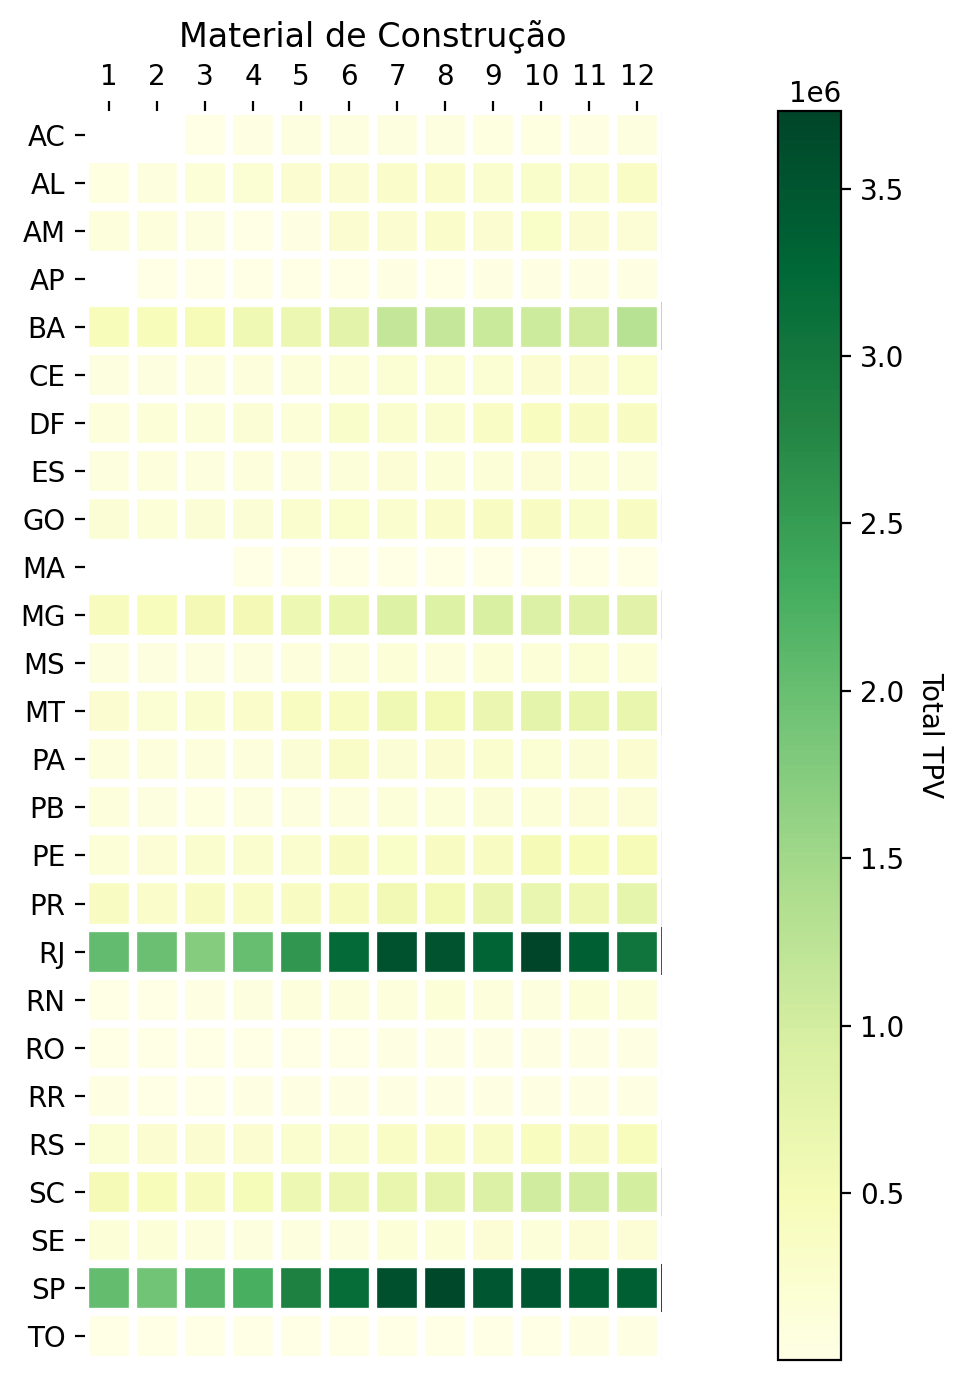

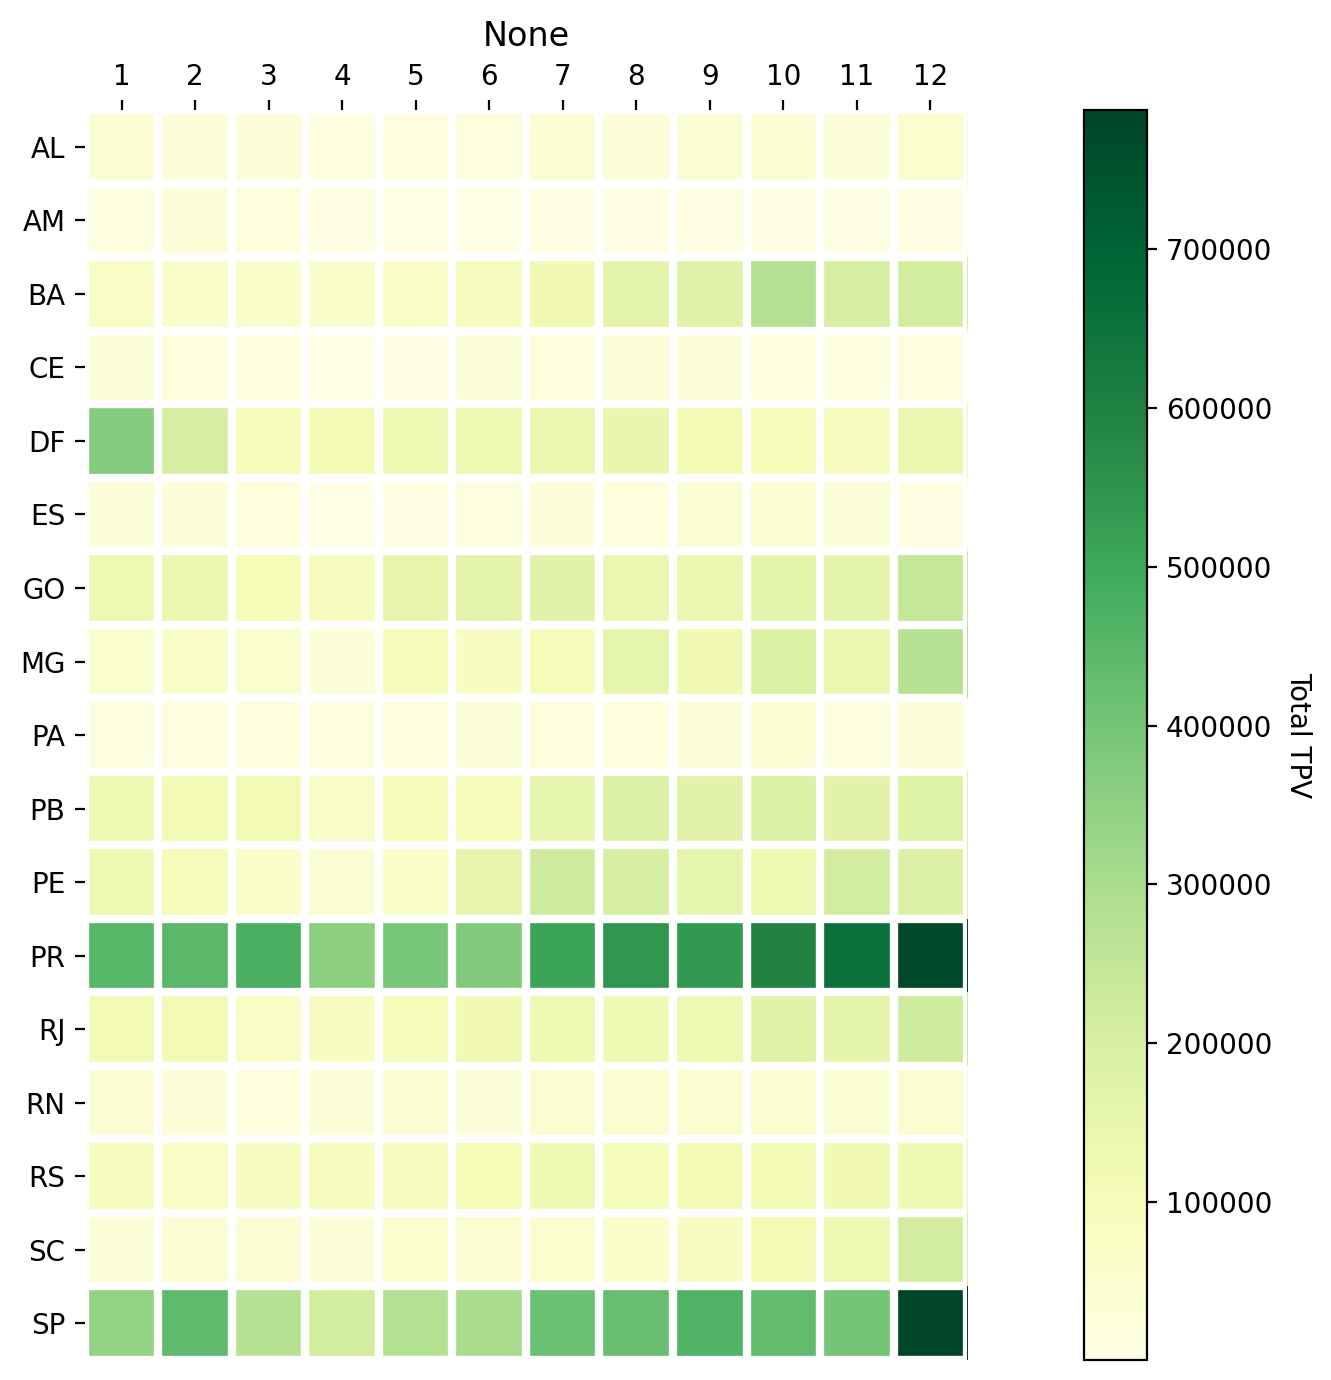

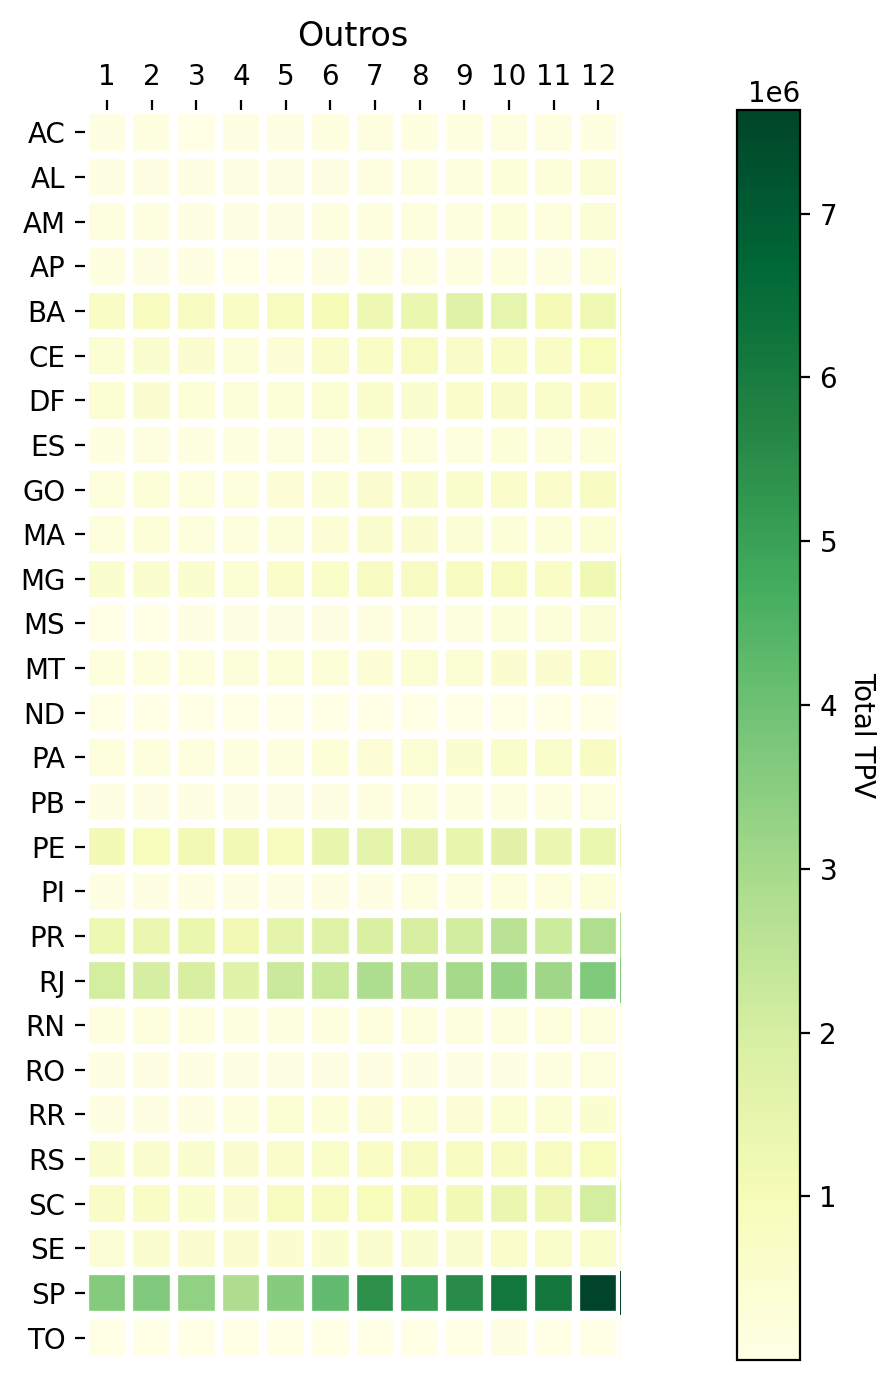

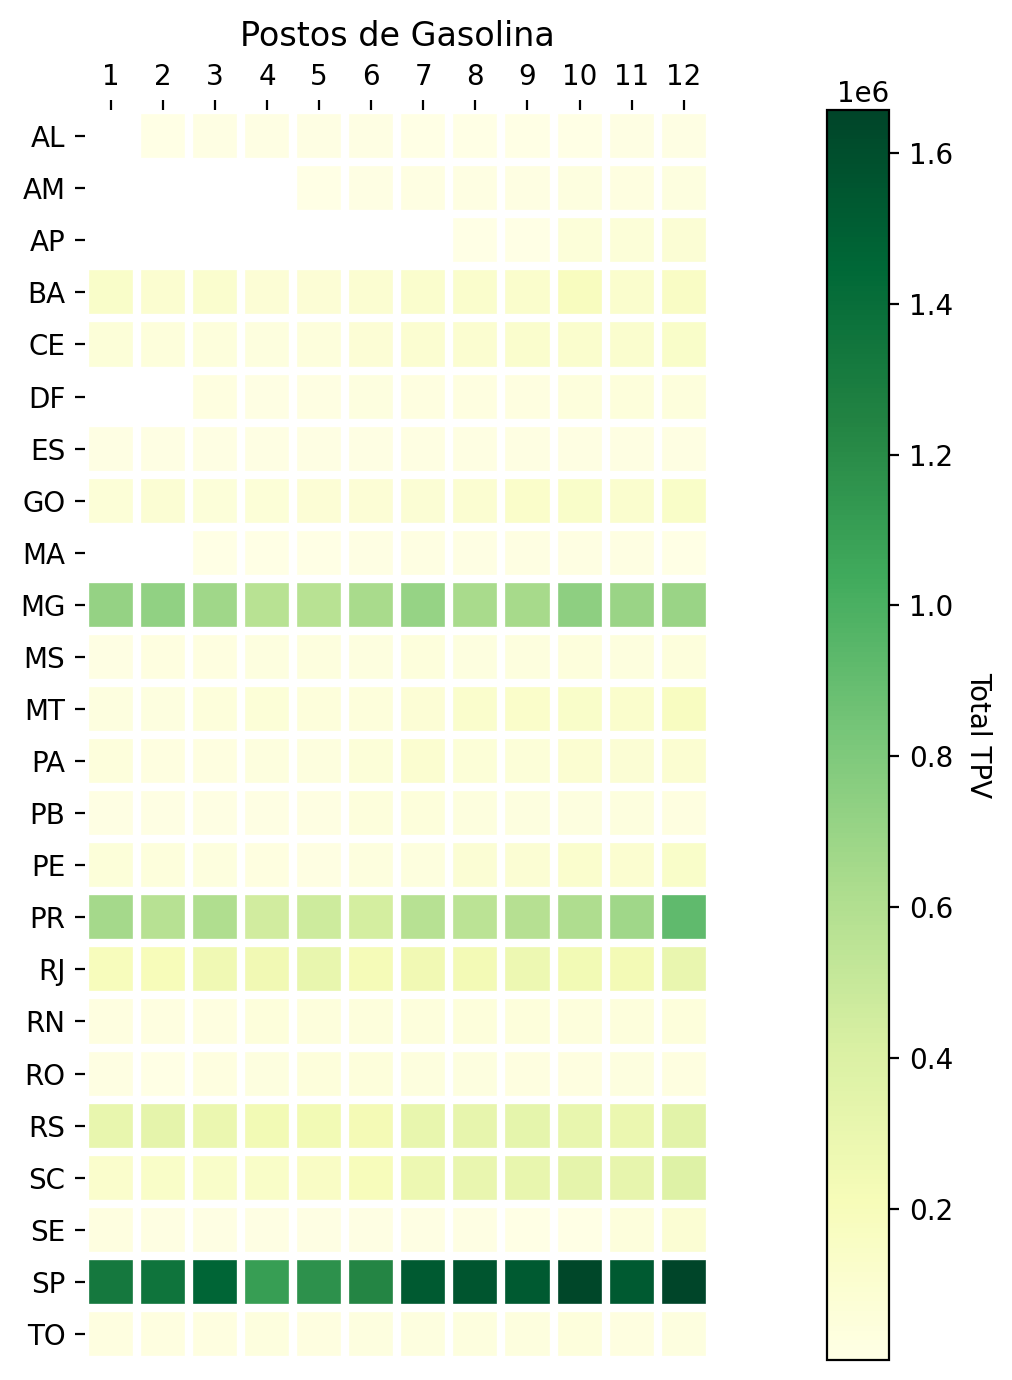

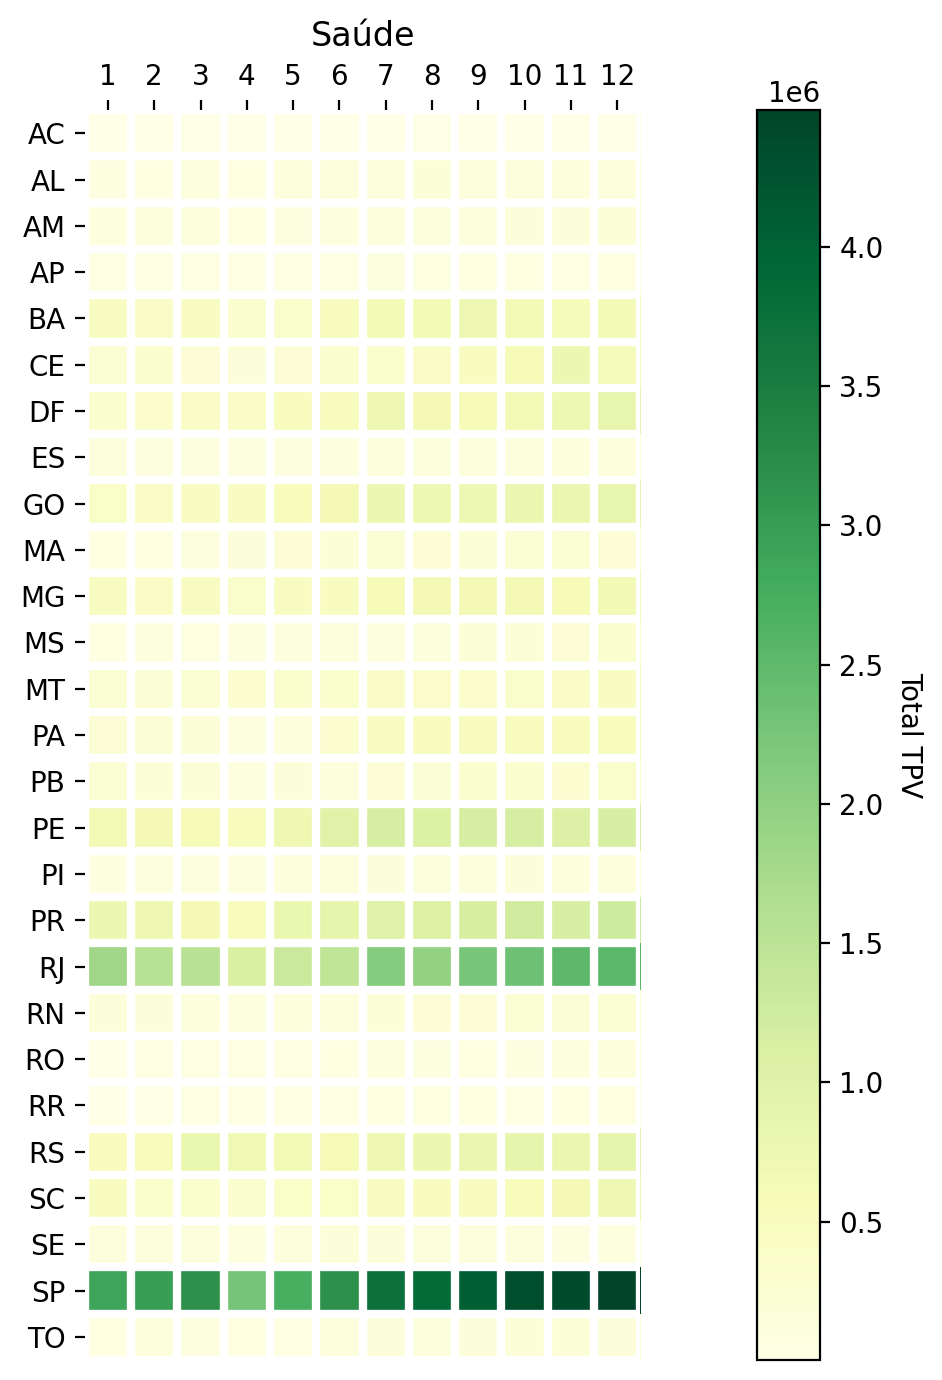

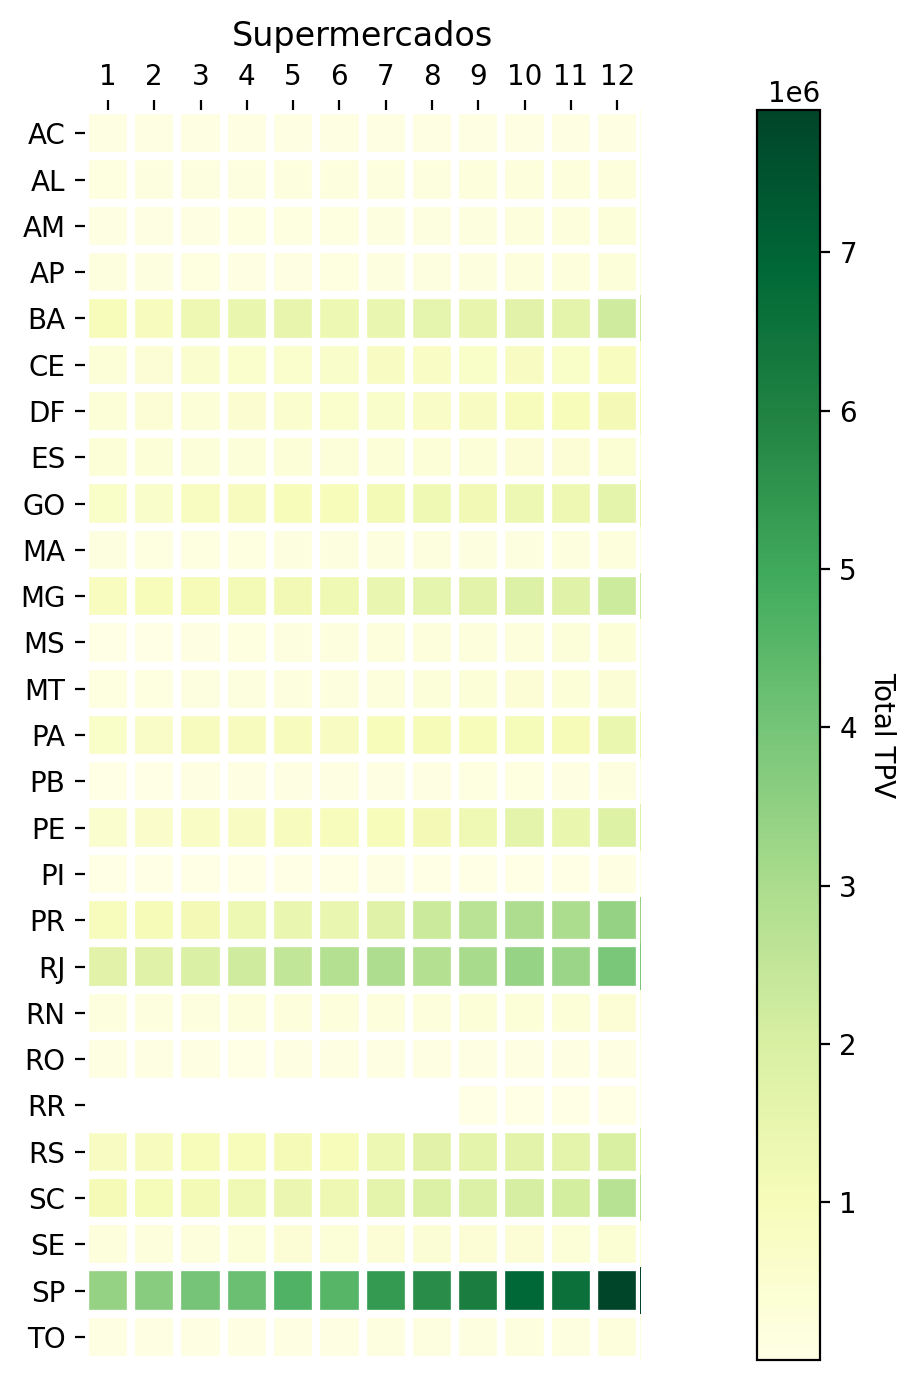

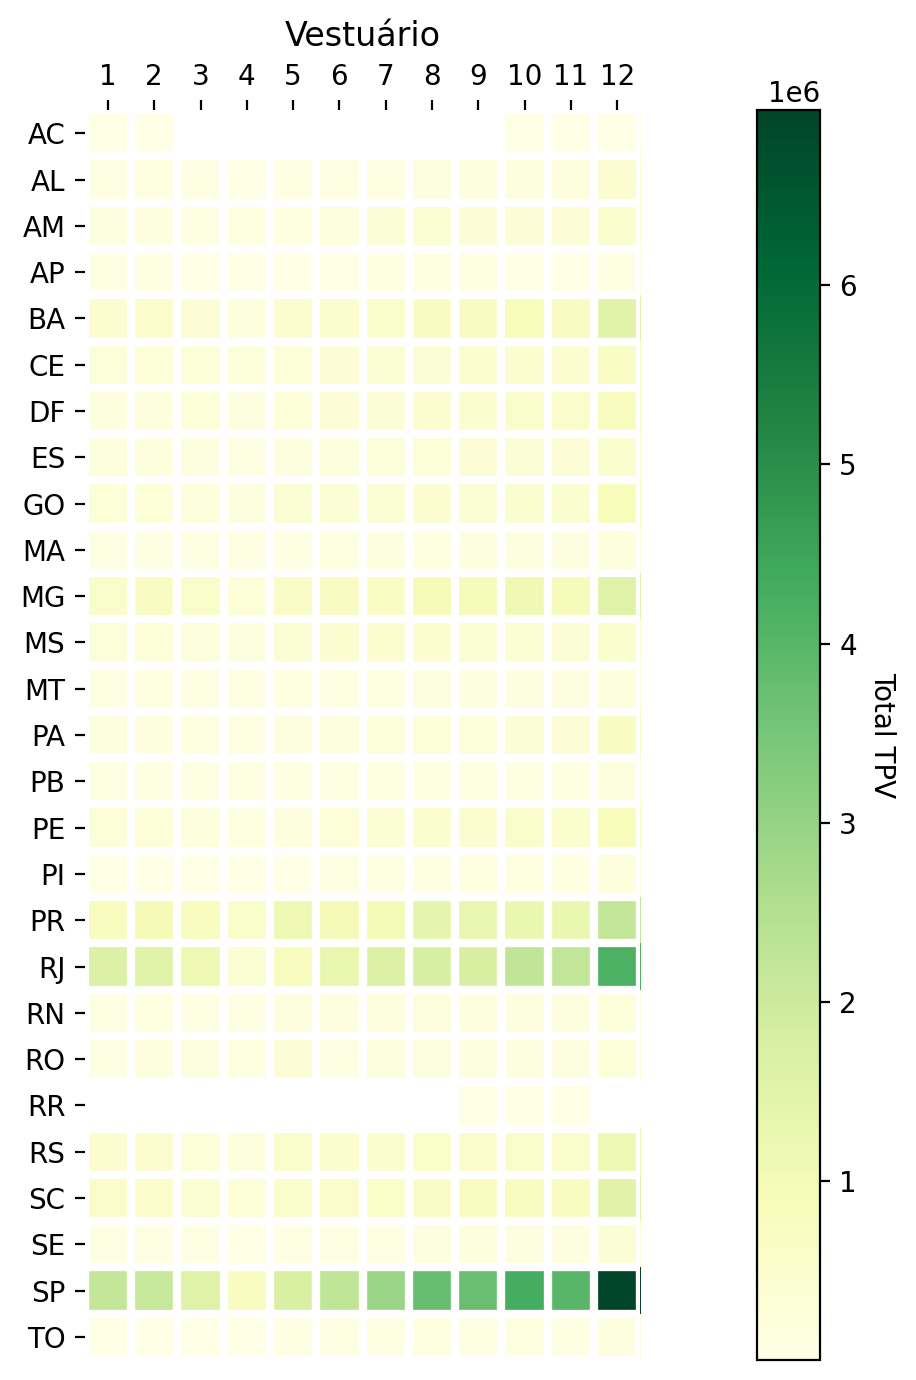

In [23]:
segmentos = list(df["subsegmento"].unique())
monhts = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for segmento in segmentos:
    df_segmento = df[(df["year"] == 2020) & (df["subsegmento"] == segmento)]
    estados = list(df_segmento["estado"].unique())

    df_heatmap = df_segmento.drop(["subsegmento"], axis=1).pivot_table(
        values="sum", index=["estado"], columns=["month"]
    )

    fig, ax = plt.subplots()

    im, cbar = plot.heatmap(
        df_heatmap, estados, monhts, ax=ax, cmap="YlGn", cbarlabel="Total TPV"
    )

    # Number of accent colors in the color scheme
    plt.title(segmento)
    fig.tight_layout()
    plt.show()

## Comunicados 

In [24]:
comunicados.value_counts("status", normalize=True)

status
NAO ENTREGUE    0.473589
ENTREGUE        0.341683
LIDO            0.176797
RESPONDIDO      0.007931
dtype: float64

In [25]:
comunicados.value_counts(["status", "tipo_acao"], normalize=True).reset_index()

,status,tipo_acao,0
0,NAO ENTREGUE,HSM,0.236836
1,NAO ENTREGUE,EMAIL,0.236754
2,ENTREGUE,HSM,0.171046
3,ENTREGUE,EMAIL,0.170637
4,LIDO,HSM,0.088706
5,LIDO,EMAIL,0.088091
6,RESPONDIDO,EMAIL,0.004518
7,RESPONDIDO,HSM,0.003413


In [26]:
comunicados.value_counts("acao", normalize=True).reset_index()

,acao,0
0,campanhaobservacao,0.528395
1,campanhaparcelamento,0.222732
2,campanhaboletoquitado,0.169342
3,campanhaprenegativacao,0.052484
4,campanhanegativacao,0.027047


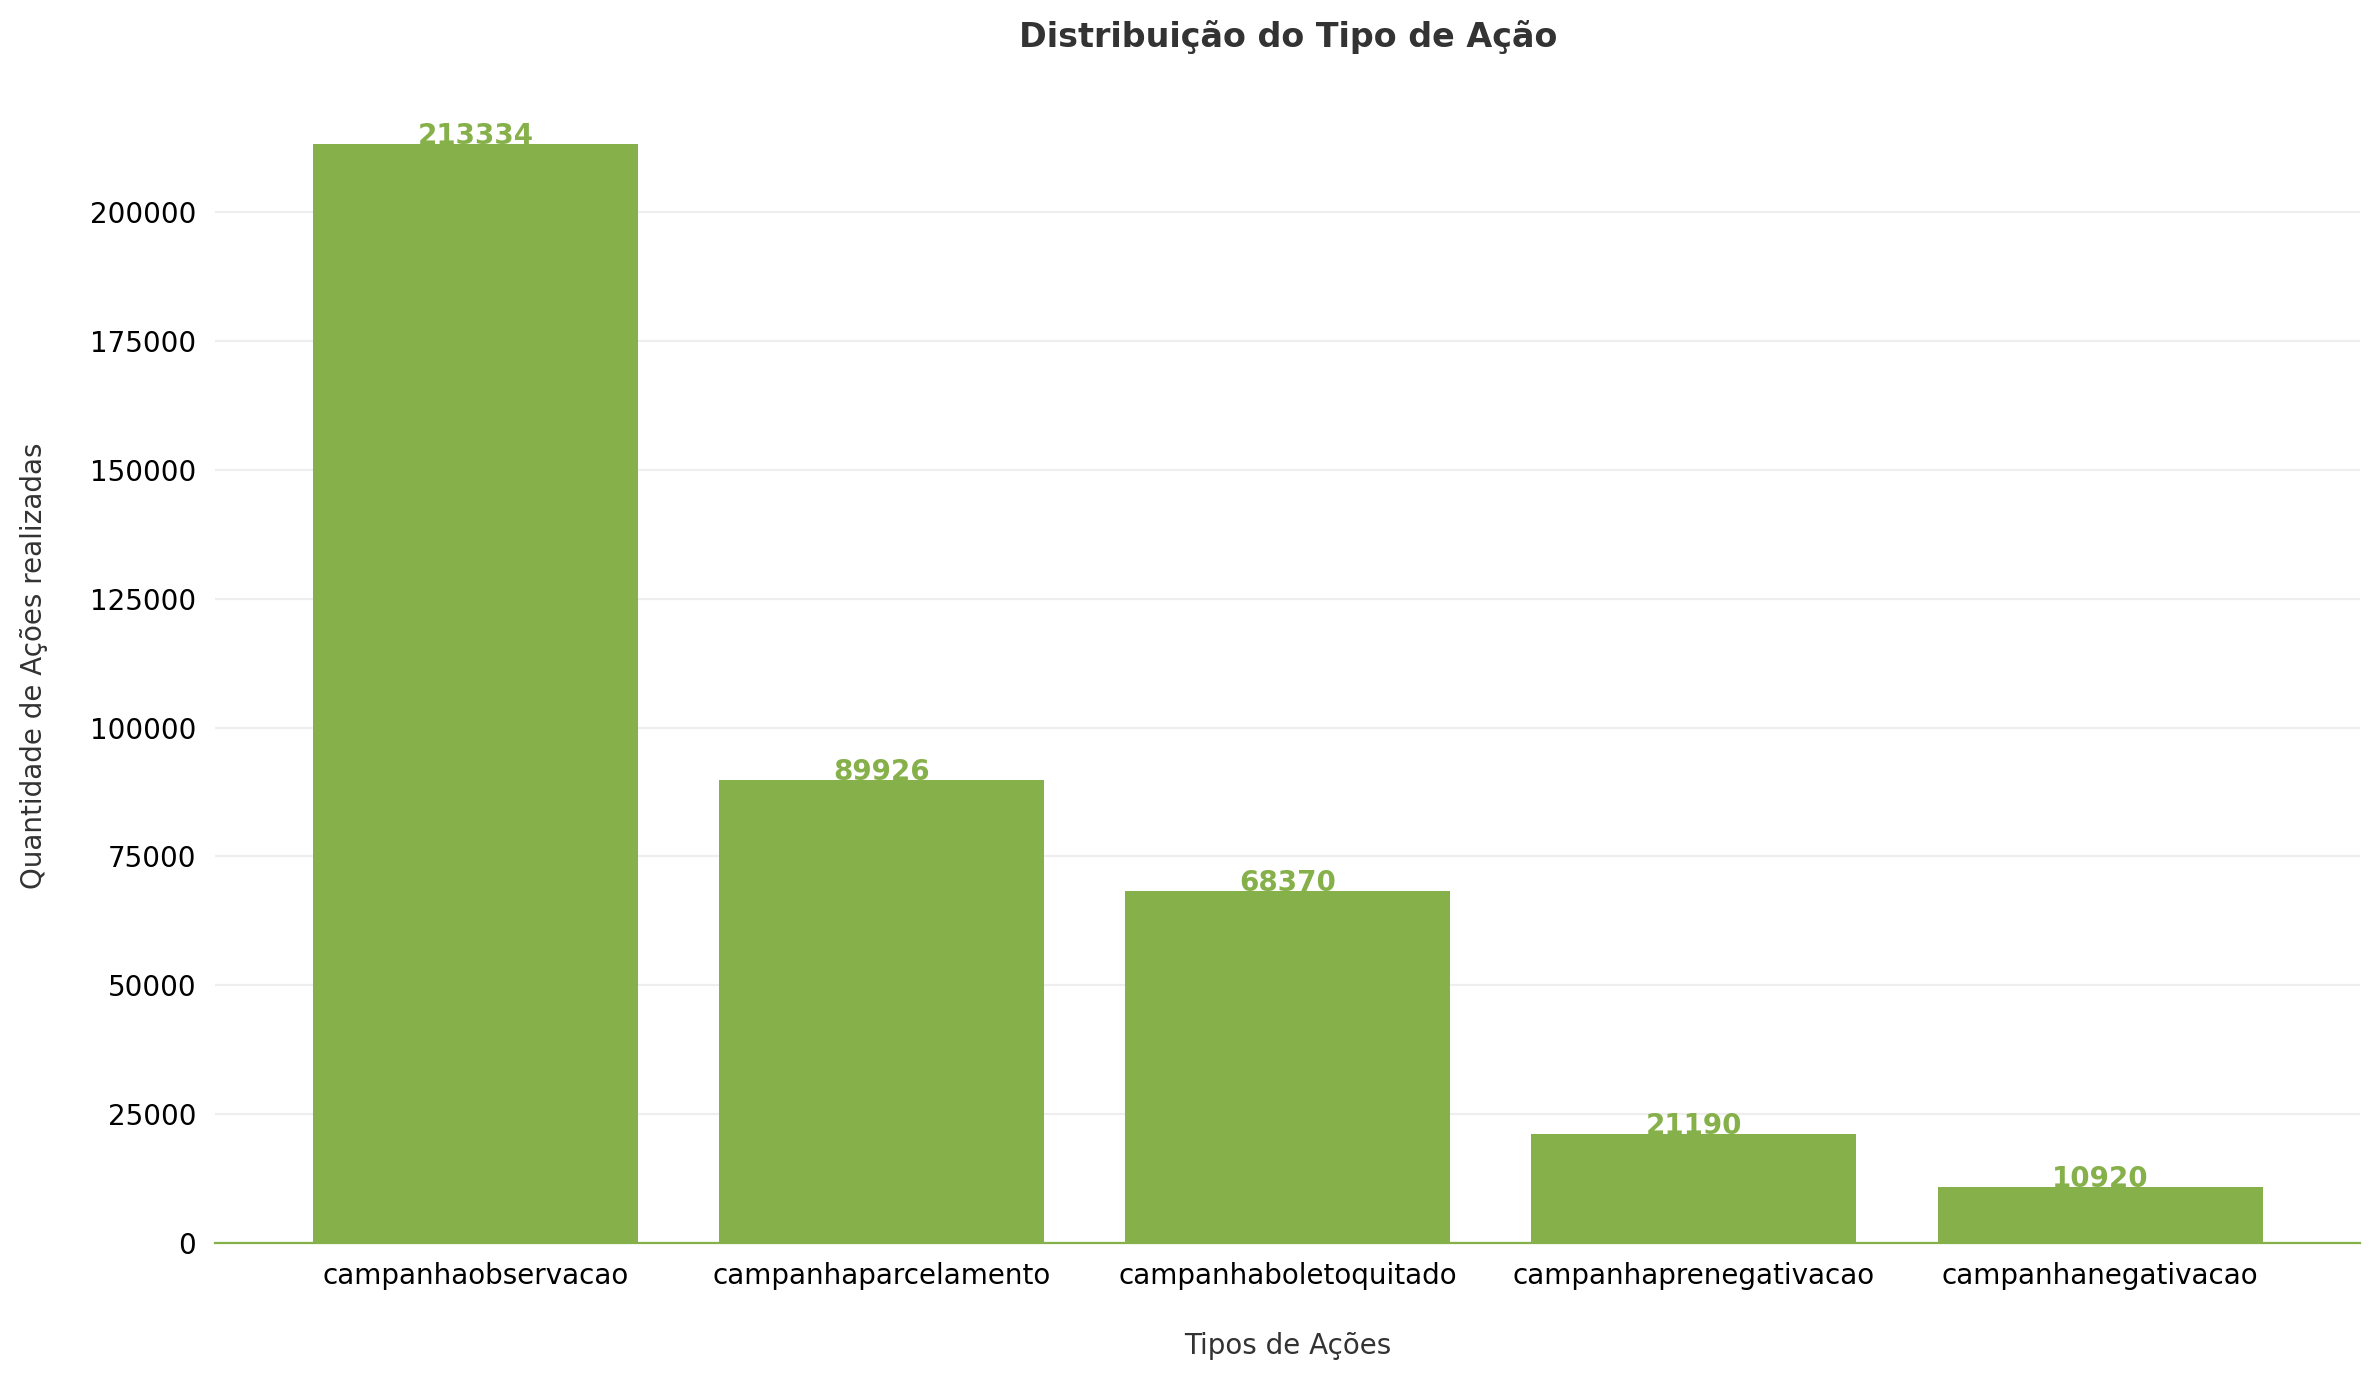

In [27]:
counts = comunicados.value_counts("acao").reset_index()

y = counts[0].values
x = counts["acao"].values

plot.make_beautiful_bar_plots(
    x,
    y,
    "Distribuição do Tipo de Ação",
    "Tipos de Ações",
    "Quantidade de Ações realizadas",
    False,
)